# 给狗打分也能火？一份WeRateDogs的分析报告

# 一些背景知识
---
WeRateDogs是一个现象极的狗狗评分网站，它与众不同的打分机制及高质量的狗狗图片和幽默为主的推特风格让它在短短两年时间便在Twitter上积累的760万粉丝，并创造出了 doggos”和“ puppers”等网络流行词汇。不幸的是因为恶意的版权纠纷被twitter两度封禁，这甚至引起了国际媒体对此事件的关注。不过目前它依然活跃在各大社交平台上，并有了自己的专属周边。[引自维基百科](https://en.wikipedia.org/wiki/WeRateDogs#cite_note-8)

我们拿到了关于WeRateDogs15至17年的推文数据并尝试探索其受欢迎的秘密


<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#给狗打分也能火？一份WeRateDogs的分析报告" data-toc-modified-id="给狗打分也能火？一份WeRateDogs的分析报告-1">给狗打分也能火？一份WeRateDogs的分析报告</a></span></li><li><span><a href="#一些背景知识" data-toc-modified-id="一些背景知识-2">一些背景知识</a></span><ul class="toc-item"><li><span><a href="#1.数据清洗——千里之行始于足下" data-toc-modified-id="1.数据清洗——千里之行始于足下-2.1">1.数据清洗——千里之行始于足下</a></span><ul class="toc-item"><li><span><a href="#1.1依赖包的导入" data-toc-modified-id="1.1依赖包的导入-2.1.1">1.1依赖包的导入</a></span></li><li><span><a href="#1.2数据集初探" data-toc-modified-id="1.2数据集初探-2.1.2">1.2数据集初探</a></span><ul class="toc-item"><li><span><a href="#1.2.1加载数据集" data-toc-modified-id="1.2.1加载数据集-2.1.2.1">1.2.1加载数据集</a></span></li><li><span><a href="#1.2.2数据预览" data-toc-modified-id="1.2.2数据预览-2.1.2.2">1.2.2数据预览</a></span></li></ul></li><li><span><a href="#1.3数据集整理" data-toc-modified-id="1.3数据集整理-2.1.3">1.3数据集整理</a></span><ul class="toc-item"><li><span><a href="#1.3.1去除不需要的列" data-toc-modified-id="1.3.1去除不需要的列-2.1.3.1">1.3.1去除不需要的列</a></span></li><li><span><a href="#1.3.2数据合并" data-toc-modified-id="1.3.2数据合并-2.1.3.2">1.3.2数据合并</a></span></li></ul></li><li><span><a href="#1.4清洗数据" data-toc-modified-id="1.4清洗数据-2.1.4">1.4清洗数据</a></span><ul class="toc-item"><li><span><a href="#问题1-关于数据结构和数据类型的问题：" data-toc-modified-id="问题1-关于数据结构和数据类型的问题：-2.1.4.1">问题1-关于数据结构和数据类型的问题：</a></span></li><li><span><a href="#问题2-关于name列的问题：" data-toc-modified-id="问题2-关于name列的问题：-2.1.4.2">问题2-关于name列的问题：</a></span></li><li><span><a href="#问题3：rating_numerator和rating_denominator列数值错误" data-toc-modified-id="问题3：rating_numerator和rating_denominator列数值错误-2.1.4.3">问题3：rating_numerator和rating_denominator列数值错误</a></span></li><li><span><a href="#问题4：favorite_counts为0" data-toc-modified-id="问题4：favorite_counts为0-2.1.4.4">问题4：favorite_counts为0</a></span></li><li><span><a href="#问题5：修改column名称" data-toc-modified-id="问题5：修改column名称-2.1.4.5">问题5：修改column名称</a></span></li><li><span><a href="#问题6：汇总模型预测结果" data-toc-modified-id="问题6：汇总模型预测结果-2.1.4.6">问题6：汇总模型预测结果</a></span></li></ul></li><li><span><a href="#1.5做一点特征工程吧" data-toc-modified-id="1.5做一点特征工程吧-2.1.5">1.5做一点特征工程吧</a></span><ul class="toc-item"><li><span><a href="#从text中提取性别" data-toc-modified-id="从text中提取性别-2.1.5.1">从text中提取性别</a></span></li><li><span><a href="#计算转赞比retweet/like" data-toc-modified-id="计算转赞比retweet/like-2.1.5.2">计算转赞比retweet/like</a></span></li><li><span><a href="#统计一下一些里程碑数据吧" data-toc-modified-id="统计一下一些里程碑数据吧-2.1.5.3">统计一下一些里程碑数据吧</a></span></li><li><span><a href="#给评分分个类" data-toc-modified-id="给评分分个类-2.1.5.4">给评分分个类</a></span></li></ul></li></ul></li><li><span><a href="#2.数据可视化——眼见为实" data-toc-modified-id="2.数据可视化——眼见为实-2.2">2.数据可视化——眼见为实</a></span><ul class="toc-item"><li><span><a href="#2.1数据概览" data-toc-modified-id="2.1数据概览-2.2.1">2.1数据概览</a></span></li><li><span><a href="#2.2类别数据分布一览" data-toc-modified-id="2.2类别数据分布一览-2.2.2">2.2类别数据分布一览</a></span><ul class="toc-item"><li><span><a href="#生长状态情况" data-toc-modified-id="生长状态情况-2.2.2.1">生长状态情况</a></span></li><li><span><a href="#品种分布情况" data-toc-modified-id="品种分布情况-2.2.2.2">品种分布情况</a></span></li><li><span><a href="#关于狗狗的微博占比情况" data-toc-modified-id="关于狗狗的微博占比情况-2.2.2.3">关于狗狗的微博占比情况</a></span></li><li><span><a href="#评分的分布情况" data-toc-modified-id="评分的分布情况-2.2.2.4">评分的分布情况</a></span></li><li><span><a href="#性别分布" data-toc-modified-id="性别分布-2.2.2.5">性别分布</a></span></li></ul></li><li><span><a href="#2.3名字词云" data-toc-modified-id="2.3名字词云-2.2.3">2.3名字词云</a></span></li><li><span><a href="#2.4数值数据一览" data-toc-modified-id="2.4数值数据一览-2.2.4">2.4数值数据一览</a></span><ul class="toc-item"><li><span><a href="#点赞量与转发量" data-toc-modified-id="点赞量与转发量-2.2.4.1">点赞量与转发量</a></span></li><li><span><a href="#转赞比" data-toc-modified-id="转赞比-2.2.4.2">转赞比</a></span></li></ul></li><li><span><a href="#2.5变量相关性" data-toc-modified-id="2.5变量相关性-2.2.5">2.5变量相关性</a></span></li><li><span><a href="#2.6加入时间因素的数值变量变化趋势" data-toc-modified-id="2.6加入时间因素的数值变量变化趋势-2.2.6">2.6加入时间因素的数值变量变化趋势</a></span><ul class="toc-item"><li><span><a href="#每月推特量" data-toc-modified-id="每月推特量-2.2.6.1">每月推特量</a></span></li><li><span><a href="#每月点赞量" data-toc-modified-id="每月点赞量-2.2.6.2">每月点赞量</a></span></li><li><span><a href="#每月平均推特点赞量" data-toc-modified-id="每月平均推特点赞量-2.2.6.3">每月平均推特点赞量</a></span></li><li><span><a href="#数据一览——点赞量/转发量/转赞比" data-toc-modified-id="数据一览——点赞量/转发量/转赞比-2.2.6.4">数据一览——点赞量/转发量/转赞比</a></span></li><li><span><a href="#得分随时间的变化" data-toc-modified-id="得分随时间的变化-2.2.6.5">得分随时间的变化</a></span></li></ul></li><li><span><a href="#2.7关于时间我们可以考虑的更多" data-toc-modified-id="2.7关于时间我们可以考虑的更多-2.2.7">2.7关于时间我们可以考虑的更多</a></span><ul class="toc-item"><li><span><a href="#每日发推时间对点赞量的影响" data-toc-modified-id="每日发推时间对点赞量的影响-2.2.7.1">每日发推时间对点赞量的影响</a></span></li><li><span><a href="#每周发推时间有什么影响?" data-toc-modified-id="每周发推时间有什么影响?-2.2.7.2">每周发推时间有什么影响?</a></span></li></ul></li><li><span><a href="#2.8关于一些分类数据对粉丝喜爱程度的影响" data-toc-modified-id="2.8关于一些分类数据对粉丝喜爱程度的影响-2.2.8">2.8关于一些分类数据对粉丝喜爱程度的影响</a></span><ul class="toc-item"><li><span><a href="#喜欢拉布拉多还是哈士奇？——品种的影响" data-toc-modified-id="喜欢拉布拉多还是哈士奇？——品种的影响-2.2.8.1">喜欢拉布拉多还是哈士奇？——品种的影响</a></span></li><li><span><a href="#喜欢大狗还是小狗？——对生长状态的分析" data-toc-modified-id="喜欢大狗还是小狗？——对生长状态的分析-2.2.8.2">喜欢大狗还是小狗？——对生长状态的分析</a></span></li><li><span><a href="#评分与点赞量/转赞比的关系" data-toc-modified-id="评分与点赞量/转赞比的关系-2.2.8.3">评分与点赞量/转赞比的关系</a></span></li><li><span><a href="#推特主题的影响（是否是狗）" data-toc-modified-id="推特主题的影响（是否是狗）-2.2.8.4">推特主题的影响（是否是狗）</a></span></li><li><span><a href="#性别的影响" data-toc-modified-id="性别的影响-2.2.8.5">性别的影响</a></span></li></ul></li></ul></li><li><span><a href="#3.统计学检验——我们的结论是否可信" data-toc-modified-id="3.统计学检验——我们的结论是否可信-2.3">3.统计学检验——我们的结论是否可信</a></span><ul class="toc-item"><li><span><a href="#3.1对发推量前10的狗狗的点赞量做单因素方差分析(One-Way-ANOVA)" data-toc-modified-id="3.1对发推量前10的狗狗的点赞量做单因素方差分析(One-Way-ANOVA)-2.3.1">3.1对发推量前10的狗狗的点赞量做单因素方差分析(One-Way ANOVA)</a></span><ul class="toc-item"><li><span><a href="#正态性检验" data-toc-modified-id="正态性检验-2.3.1.1">正态性检验</a></span></li><li><span><a href="#样本方差齐性检验" data-toc-modified-id="样本方差齐性检验-2.3.1.2">样本方差齐性检验</a></span></li><li><span><a href="#Kruskal-Wallis-H检验" data-toc-modified-id="Kruskal-Wallis-H检验-2.3.1.3">Kruskal-Wallis H检验</a></span></li><li><span><a href="#后续检验-Dunn's检验" data-toc-modified-id="后续检验-Dunn's检验-2.3.1.4">后续检验 Dunn's检验</a></span></li><li><span><a href="#效应量的计算" data-toc-modified-id="效应量的计算-2.3.1.5">效应量的计算</a></span></li></ul></li><li><span><a href="#3.2平均点赞量前十的狗狗点赞量做单因素方差分析（包含冷门狗狗）" data-toc-modified-id="3.2平均点赞量前十的狗狗点赞量做单因素方差分析（包含冷门狗狗）-2.3.2">3.2平均点赞量前十的狗狗点赞量做单因素方差分析（包含冷门狗狗）</a></span><ul class="toc-item"><li><span><a href="#方差齐性检验（Levene检验）" data-toc-modified-id="方差齐性检验（Levene检验）-2.3.2.1">方差齐性检验（Levene检验）</a></span></li><li><span><a href="#Kruskal-Wallis-H检验" data-toc-modified-id="Kruskal-Wallis-H检验-2.3.2.2">Kruskal-Wallis H检验</a></span></li></ul></li><li><span><a href="#3.3对发推量前十的狗狗的转赞比做单因素方差分析" data-toc-modified-id="3.3对发推量前十的狗狗的转赞比做单因素方差分析-2.3.3">3.3对发推量前十的狗狗的转赞比做单因素方差分析</a></span><ul class="toc-item"><li><span><a href="#正态性检验" data-toc-modified-id="正态性检验-2.3.3.1">正态性检验</a></span></li><li><span><a href="#样本方差齐性检验" data-toc-modified-id="样本方差齐性检验-2.3.3.2">样本方差齐性检验</a></span></li><li><span><a href="#Kruskal-Wallis-H检验" data-toc-modified-id="Kruskal-Wallis-H检验-2.3.3.3">Kruskal-Wallis H检验</a></span></li><li><span><a href="#后续检验-Dunn's检验" data-toc-modified-id="后续检验-Dunn's检验-2.3.3.4">后续检验 Dunn's检验</a></span></li><li><span><a href="#效应量计算" data-toc-modified-id="效应量计算-2.3.3.5">效应量计算</a></span></li></ul></li><li><span><a href="#3.4对平均转赞比前十的狗狗做单因素方差分析" data-toc-modified-id="3.4对平均转赞比前十的狗狗做单因素方差分析-2.3.4">3.4对平均转赞比前十的狗狗做单因素方差分析</a></span><ul class="toc-item"><li><span><a href="#样本方差齐性检验" data-toc-modified-id="样本方差齐性检验-2.3.4.1">样本方差齐性检验</a></span></li><li><span><a href="#Kruskal-Wallis-H检验" data-toc-modified-id="Kruskal-Wallis-H检验-2.3.4.2">Kruskal-Wallis H检验</a></span></li><li><span><a href="#小结：" data-toc-modified-id="小结：-2.3.4.3">小结：</a></span></li></ul></li><li><span><a href="#3.5对不同生长阶段的狗狗的点赞量做单因素方差分析" data-toc-modified-id="3.5对不同生长阶段的狗狗的点赞量做单因素方差分析-2.3.5">3.5对不同生长阶段的狗狗的点赞量做单因素方差分析</a></span><ul class="toc-item"><li><span><a href="#样本方差齐性检验" data-toc-modified-id="样本方差齐性检验-2.3.5.1">样本方差齐性检验</a></span></li><li><span><a href="#Kruskal-Wallis-H检验" data-toc-modified-id="Kruskal-Wallis-H检验-2.3.5.2">Kruskal-Wallis H检验</a></span></li><li><span><a href="#效应值计算" data-toc-modified-id="效应值计算-2.3.5.3">效应值计算</a></span></li></ul></li><li><span><a href="#3.6对不同生长阶段的狗狗的转赞比做单因素方差分析" data-toc-modified-id="3.6对不同生长阶段的狗狗的转赞比做单因素方差分析-2.3.6">3.6对不同生长阶段的狗狗的转赞比做单因素方差分析</a></span><ul class="toc-item"><li><span><a href="#Kruskal-Wallis-H检验" data-toc-modified-id="Kruskal-Wallis-H检验-2.3.6.1">Kruskal-Wallis H检验</a></span></li><li><span><a href="#小结：" data-toc-modified-id="小结：-2.3.6.2">小结：</a></span></li></ul></li><li><span><a href="#3.7评分与点赞量/转发量的回归分析" data-toc-modified-id="3.7评分与点赞量/转发量的回归分析-2.3.7">3.7评分与点赞量/转发量的回归分析</a></span><ul class="toc-item"><li><span><a href="#对点赞量的线性回归分析" data-toc-modified-id="对点赞量的线性回归分析-2.3.7.1">对点赞量的线性回归分析</a></span></li><li><span><a href="#对转发量的线性回归分析" data-toc-modified-id="对转发量的线性回归分析-2.3.7.2">对转发量的线性回归分析</a></span></li></ul></li><li><span><a href="#3.8对不同评分等级狗狗点赞量的单因素方差分析" data-toc-modified-id="3.8对不同评分等级狗狗点赞量的单因素方差分析-2.3.8">3.8对不同评分等级狗狗点赞量的单因素方差分析</a></span><ul class="toc-item"><li><span><a href="#正态性检验" data-toc-modified-id="正态性检验-2.3.8.1">正态性检验</a></span></li><li><span><a href="#样本方差齐性检验" data-toc-modified-id="样本方差齐性检验-2.3.8.2">样本方差齐性检验</a></span></li><li><span><a href="#Kruskal-Wallis-H检验" data-toc-modified-id="Kruskal-Wallis-H检验-2.3.8.3">Kruskal-Wallis H检验</a></span></li><li><span><a href="#后续检验-Dunn's检验" data-toc-modified-id="后续检验-Dunn's检验-2.3.8.4">后续检验 Dunn's检验</a></span></li><li><span><a href="#效应量计算" data-toc-modified-id="效应量计算-2.3.8.5">效应量计算</a></span></li></ul></li><li><span><a href="#3.9对不同评分等级等级转赞比的单因素方差分析" data-toc-modified-id="3.9对不同评分等级等级转赞比的单因素方差分析-2.3.9">3.9对不同评分等级等级转赞比的单因素方差分析</a></span><ul class="toc-item"><li><span><a href="#正态性检验" data-toc-modified-id="正态性检验-2.3.9.1">正态性检验</a></span></li><li><span><a href="#样本方差齐性检验" data-toc-modified-id="样本方差齐性检验-2.3.9.2">样本方差齐性检验</a></span></li><li><span><a href="#Kruskal-Wallis-H检验" data-toc-modified-id="Kruskal-Wallis-H检验-2.3.9.3">Kruskal-Wallis H检验</a></span></li><li><span><a href="#后续检验-Dunn's检验" data-toc-modified-id="后续检验-Dunn's检验-2.3.9.4">后续检验 Dunn's检验</a></span></li><li><span><a href="#效应量计算" data-toc-modified-id="效应量计算-2.3.9.5">效应量计算</a></span></li><li><span><a href="#小结" data-toc-modified-id="小结-2.3.9.6">小结</a></span></li></ul></li></ul></li><li><span><a href="#4总结" data-toc-modified-id="4总结-2.4">4总结</a></span><ul class="toc-item"><li><span><a href="#4.1数据集的清洗和整理" data-toc-modified-id="4.1数据集的清洗和整理-2.4.1">4.1数据集的清洗和整理</a></span></li><li><span><a href="#4.2可视化" data-toc-modified-id="4.2可视化-2.4.2">4.2可视化</a></span></li><li><span><a href="#4.3-统计检验" data-toc-modified-id="4.3-统计检验-2.4.3">4.3 统计检验</a></span></li><li><span><a href="#4.4反思" data-toc-modified-id="4.4反思-2.4.4">4.4反思</a></span></li></ul></li></ul></li></ul></div>

在进行分析之前，我们需要明确，什么是“更受欢迎”。传统意义上，我们需要知道一条推特在发出的时候有多少关注者，这条推特有多少浏览量，多少点赞数和多少转发数，来一步一步计算转化比例。在这一框架中，更多的浏览量可能意味着火爆，但更多的关注点赞和转发量显然比浏览量才是获取稳定流量的关键。

在这篇分析中，我们将围绕两个维度进行受欢迎程度的探索：

- **点赞量**，在拿不到关注量和浏览量这两个数据的前提之下，点赞量(数据集中叫favorite）是最能直接反映一条推文得到关注和赞赏的指标；
- **转发量** 相较于点赞，转发显得更加难能可贵，它甚至是涨粉的最关键因素之一；
- **转赞比**（Retweet/Favorite Ratio），衡量的是转发用户占点赞用户的比例，用于衡量核心用户占整体点赞用户的比例；

## 1.数据清洗——千里之行始于足下

### 1.1依赖包的导入

In [1]:
# 导入项目基础依赖包
import re
import requests
import datetime
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# 设定pandas dataframe的显示宽度，防止折叠
pd.set_option('display.max_colwidth', 35)

# 设置pandas dataframe的最大行数，显著节约空间，减少割裂感
pd.set_option('display.max_rows', 10)

In [2]:
# 统计学相关包
import scikit_posthocs as sp
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [3]:
# 导入项目可视化部分依赖包
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as of
import plotly.graph_objs as go
of.init_notebook_mode(connected=True)

from matplotlib.colors import ListedColormap

%matplotlib inline
sns.set_style("whitegrid")#背景网格

In [4]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)#显示中文
sns.set(font=myfont.get_name())
plt.rcParams['axes.unicode_minus']=False#显示负号

In [5]:
# 获取文件路径，用于文件存储
import os
os.getcwd()

'D:\\jupyter\\we-rate-dogs'

In [6]:
# 导入展示图片所需的库
from PIL import Image
from io import BytesIO

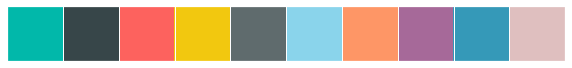

In [7]:
# 主色调
ui = ["#01B8AA", "#374649", "#FD625E", "#F2C80F", "#5F6B6D", "#8AD4EB", "#FE9666", "#A66999", "#3599B8", "#DFBFBF"]
# 浅一阶
ui_light = ["#4AC5BB", "#5F6B6D", "#FB8281", "#F4D25A","#7F898A", "#A4DDEE", "#FDAB89", "#B687AC", "#28738A", "#A78F8F"]
# 深一阶
ui_dark = ["#168980", "#293537", "#BB4A4A", "#B59525", "#475052", "#6A9FB0", "#BD7150", "#7B4F71", "#1B4D5C", "#706060"]

# 将颜色设定为Seaborn Palette
ui_palette_light = sns.color_palette(ui_light)
ui_palette_dark = sns.color_palette(ui_dark)
ui_palette_default = sns.set_palette(ui)

# 主色调预览
sns.palplot(sns.color_palette(ui))

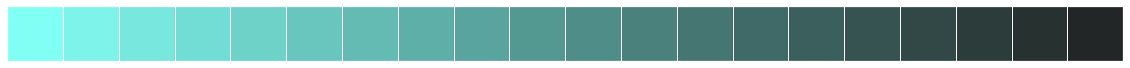

In [8]:
# 设置可视化颜色-连续类别
sequential_ui = sns.dark_palette(
    "#82FFF5", n_colors=20, reverse=True, as_cmap=True)
sequential_ui_palette_reverse = sns.dark_palette(
    "#82FFF5", n_colors=20, reverse=False)
sns.palplot(sns.dark_palette("#82FFF5", n_colors=20, reverse=True))


### 1.2数据集初探

#### 1.2.1加载数据集

In [9]:
# 加载包含狗狗信息的原始数据集，并命名为“dogrates"
dogrates = pd.read_csv('twitter-archive-enhanced.csv', encoding='utf8')

In [10]:
# 加载包含了预测狗狗品种的数据集，并命名为breeds
breeds = pd.read_csv('image-predictions.tsv',sep = '\t',encoding='utf-8')

In [11]:
# 加载推特转载数记录的数据集，并将其命名为retweet
retweets = pd.read_json('tweet.json',orient='string',lines=True, encoding='utf8')

#### 1.2.2数据预览

In [12]:
dogrates.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1612,685321586178670592,NaN,NaN,2016-01-08 04:46:13 +0000,"<a href=""http://twitter.com/dow...",This is Rocky. He sleeps like a...,NaN,NaN,NaN,https://twitter.com/dog_rates/s...,10,10,Rocky,None,None,None,None


In [13]:
breeds.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [14]:
retweets.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystica...,False,"[0, 85]","{'hashtags': [], 'symbols': [],...",{'media': [{'id': 8924206394868...,"<a href=""http://twitter.com/dow...",NaN,...,39492,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


这些数据集看起来包含了许多我们不需要的信息；在如此之多的无效信息面前，我们无法做出有效的判断。因此，在评估数据质量之前，我们需要去除我们不需要的列，以减少信息干扰。

### 1.3数据集整理

#### 1.3.1去除不需要的列

- 获取表头

In [15]:
dogrates.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [16]:
breeds.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [17]:
retweets.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

- 精简数据

---
dograte数据集中，保留'tweet_id', 'timestamp', 'text','retweeted_status_user_id', 'rating_numerator','rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'列，经过精简的数据命名为dogrates_lite

In [18]:
dogrates_lite = dogrates[['tweet_id', 'timestamp', 'text','rating_numerator','rating_denominator', \
                          'name', 'doggo', 'floofer', 'pupper', 'puppo']]

In [19]:
dogrates_lite.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystica...,13,10,Phineas,None,None,None,None


---
breeds数据集中，除了'tweet_id','jpg_url'之外，我们还需要知道图片识别出的最可能的狗狗品种'p1'，以及预测图片是否为狗的列'p1_dog','p2_dog','p3_dog'，经过精简的数据集命名为breeds_lite

In [20]:
breeds_lite = breeds[['tweet_id','p1','p1_dog','p2_dog','p3_dog']]

In [21]:
breeds_lite.head(1)

,tweet_id,p1,p1_dog,p2_dog,p3_dog
0,666020888022790149,Welsh_springer_spaniel,True,True,True


---
retweets中只保留'id','favorite_count','retweet_count'三列，精简后的数据命名为retweets_lite

In [22]:
retweets_lite = retweets[['id', 'favorite_count', 'retweet_count']]

In [23]:
retweets_lite.head(1)

,id,favorite_count,retweet_count
0,892420643555336193,39492,8842


#### 1.3.2数据合并

In [24]:
#因为空值数据是没有意义的，所以将三个数据以内连接的方式合并为dog_melt

dog_melt = pd.merge(dogrates_lite,breeds_lite,on = 'tweet_id',how = 'inner')

dog_melt = dog_melt.merge(retweets_lite,left_on='tweet_id',right_on='id',how = 'inner')

dog_melt = dog_melt.drop('id',axis = 1)

In [25]:
dog_melt[dog_melt.favorite_count== 0]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,p1,p1_dog,p2_dog,p3_dog,favorite_count,retweet_count
32,885311592912609280,2017-07-13 01:35:06 +0000,RT @dog_rates: This is Lilly. S...,13,10,Lilly,None,None,None,None,Labrador_retriever,True,False,True,0,19188
67,877611172832227328,2017-06-21 19:36:23 +0000,RT @rachel2195: @dog_rates the ...,14,10,None,None,None,pupper,None,Irish_setter,True,True,True,0,82
81,873697596434513921,2017-06-11 00:25:14 +0000,RT @dog_rates: This is Walter. ...,14,10,Walter,None,None,None,None,laptop,False,True,False,0,12435
109,867072653475098625,2017-05-23 17:40:04 +0000,RT @rachaeleasler: these @dog_r...,13,10,None,None,None,None,None,Blenheim_spaniel,True,True,True,0,134
132,860924035999428608,2017-05-06 18:27:40 +0000,RT @tallylott: h*ckin adorable ...,13,10,None,None,None,None,None,envelope,False,False,False,0,879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,754874841593970688,2016-07-18 03:06:01 +0000,RT @dog_rates: This is Rubio. H...,11,10,Rubio,None,None,None,None,pug,True,True,False,0,9140
775,752309394570878976,2016-07-11 01:11:51 +0000,RT @dog_rates: Everyone needs t...,13,10,None,None,None,None,None,upright,False,True,True,0,18880
1035,711998809858043904,2016-03-21 19:31:59 +0000,RT @twitter: @dog_rates Awesome...,12,10,None,None,None,None,None,comic_book,False,True,False,0,138
1977,667550904950915073,2015-11-20 03:51:52 +0000,RT @dogratingrating: Exceptiona...,12,10,None,None,None,None,None,web_site,False,True,True,0,37


### 1.4清洗数据

In [26]:
dog_melt.info()
#没有空行
#timestamp格式不对，应为datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 16 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null object
text                  2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
p1                    2073 non-null object
p1_dog                2073 non-null bool
p2_dog                2073 non-null bool
p3_dog                2073 non-null bool
favorite_count        2073 non-null int64
retweet_count         2073 non-null int64
dtypes: bool(3), int64(5), object(8)
memory usage: 232.8+ KB


#### 问题1-关于数据结构和数据类型的问题：
- doggo，floofer，pupper，puppo有缺失值,且这四行应该合并为一行
- timestamp格式不对，应为datetime

In [27]:
#将timestamp格式转换为datetime
dog_melt.timestamp = pd.to_datetime(dog_melt.timestamp)

In [28]:
dog_melt.tweet_id.value_counts().head()
#tweet_id列看起来还好

685532292383666176    1
732585889486888962    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
Name: tweet_id, dtype: int64

---

In [29]:
#给doggo，floofer，pupper，puppo独热编码，参考：https://blog.csdn.net/qq_27825451/article/details/83823665
from sklearn import preprocessing

for i in ['doggo','floofer','pupper','puppo']:
    dog_melt[i] = preprocessing.LabelEncoder().fit_transform(dog_melt[i])

In [30]:
dog_melt[['doggo','floofer','pupper','puppo']].sum(axis = 1)
#什么？有13条推特的狗狗同时被划到了两个类

0       0
1       0
2       0
3       0
4       0
       ..
2068    0
2069    0
2070    0
2071    0
2072    0
Length: 2073, dtype: int64

In [31]:
#让我来康康都是那些奇葩狗狗
dog_melt[dog_melt[['doggo','floofer','pupper','puppo']].sum(axis = 1) == 2]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,p1,p1_dog,p2_dog,p3_dog,favorite_count,retweet_count
153,855851453814013952,2017-04-22 18:31:02+00:00,Here's a puppo participating in...,13,10,None,1,0,0,1,flat-coated_retriever,True,True,True,47679,19118
159,854010172552949760,2017-04-17 16:34:26+00:00,At first I thought this was a s...,11,10,None,1,1,0,0,English_springer,True,True,True,17120,3419
365,817777686764523521,2017-01-07 16:59:28+00:00,This is Dido. She's playing the...,13,10,Dido,1,0,1,0,curly-coated_retriever,True,True,True,11855,3071
428,808106460588765185,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and...,12,10,None,1,0,1,0,golden_retriever,True,True,True,9671,2515
456,802265048156610565,2016-11-25 21:37:47+00:00,"Like doggo, like pupper version...",11,10,None,1,0,1,0,Labrador_retriever,True,True,True,7011,1568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,770093767776997377,2016-08-29 03:00:36+00:00,RT @dog_rates: This is just dow...,12,10,just,1,0,1,0,golden_retriever,True,True,True,0,3492
722,759793422261743616,2016-07-31 16:50:42+00:00,Meet Maggie &amp; Lila. Maggie ...,12,10,Maggie,1,0,1,0,golden_retriever,True,True,True,6585,2164
780,751583847268179968,2016-07-09 01:08:47+00:00,Please stop sending it pictures...,5,10,None,1,0,1,0,dalmatian,True,False,False,4837,1260
871,741067306818797568,2016-06-10 00:39:48+00:00,This is just downright precious...,12,10,just,1,0,1,0,golden_retriever,True,True,True,10295,3492


没办法了，手工改一下吧
问题主要集中在doggo和pupper两列：

- 第153， 159， 463, 780行的推文提到的狗狗，不是doggo;
- 第365，565，780行的推文提到的狗狗，不是pupper。

In [32]:
for i in [153, 159, 463, 780]:
    dog_melt.loc[i,'doggo'] = 0

In [33]:
for i in [365,565,780]:
    dog_melt.loc[i,'pupper'] = 0

In [34]:
dog_melt[dog_melt[['doggo','floofer','pupper','puppo']].sum(axis = 1) == 2]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,p1,p1_dog,p2_dog,p3_dog,favorite_count,retweet_count
428,808106460588765185,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and...,12,10,None,1,0,1,0,golden_retriever,True,True,True,9671,2515
456,802265048156610565,2016-11-25 21:37:47+00:00,"Like doggo, like pupper version...",11,10,None,1,0,1,0,Labrador_retriever,True,True,True,7011,1568
626,775898661951791106,2016-09-14 03:27:11+00:00,RT @dog_rates: Like father (dog...,12,10,None,1,0,1,0,golden_retriever,True,True,False,0,17522
665,770093767776997377,2016-08-29 03:00:36+00:00,RT @dog_rates: This is just dow...,12,10,just,1,0,1,0,golden_retriever,True,True,True,0,3492
722,759793422261743616,2016-07-31 16:50:42+00:00,Meet Maggie &amp; Lila. Maggie ...,12,10,Maggie,1,0,1,0,golden_retriever,True,True,True,6585,2164
871,741067306818797568,2016-06-10 00:39:48+00:00,This is just downright precious...,12,10,just,1,0,1,0,golden_retriever,True,True,True,10295,3492
917,733109485275860992,2016-05-19 01:38:16+00:00,"Like father (doggo), like son (...",12,10,None,1,0,1,0,golden_retriever,True,True,False,44456,17522


剩下的多分类问题是因为图片中本来就存在两只狗狗，嗯，有点麻烦，暂且将这些图片都分类为大狗'doggo'类吧

In [35]:
#将剩下的行划分为'doggo'
for i in [428,456,626,665,722,871,917]:
    dog_melt.loc[i,'pupper'] = 0

接下来需要做的就是将这4列数据合并

In [36]:
#先将4列长数据melt为短数据
df_mid = pd.melt(dog_melt,id_vars='tweet_id',value_vars=['doggo','floofer','pupper','puppo'],var_name='stage')

In [37]:
#然后将melt后value不为0的行merge到dog_melt
dog_melt = dog_melt.merge(df_mid[df_mid.value == 1][['tweet_id','stage']],on = 'tweet_id',how = 'left')

In [38]:
dog_melt.stage.value_counts()

pupper     212
doggo       76
puppo       24
floofer      8
Name: stage, dtype: int64

In [39]:
dog_melt.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,p1,p1_dog,p2_dog,p3_dog,favorite_count,retweet_count,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystica...,13,10,Phineas,0,0,0,0,orange,False,False,False,39492,8842,NaN


In [40]:
#将'puppo','pupper','floofer','doggo'从数据集中删除
dog_melt = dog_melt.drop(['puppo','pupper','floofer','doggo'],axis = 1)

---

In [41]:
dog_melt.name.value_counts()
#None，a明显不是名字

None       577
a           55
Charlie     11
Tucker      10
Oliver      10
          ... 
Grizzie      1
Shawwn       1
Devón        1
Julio        1
Stewie       1
Name: name, Length: 936, dtype: int64

#### 问题2-关于name列的问题：
- name列存在大量空值，a，an，the等明显不是名字的值也出现了

In [42]:
dog_melt.text.iloc[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [43]:
dog_melt[dog_melt.name == 'None'].text.iloc[1]
#这种完全没提狗狗名字的推文实在是无能为力啦

"When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq"

In [44]:
dog_melt[dog_melt.name == 'None'].text.iloc[23]
#唉？这条推文似乎提到了名字，但是他提到名字的方式不同于一般的pattern

'Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen'

再找找看，希望能发现更多的提取名字的通用模式

In [45]:
#将文本打印出来
for i in range(10):
    print(dog_melt[dog_melt.name == 'None'].text.iloc[i])

Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf
I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) 

嗯...情况的复杂度超出了预期，绝大部分的空值是因为完全没有名字可以提取导致的，这就无能为力了。且花大量时间手动寻找和统计名字是非常不划算的一件事，并且根据常识，名字对推特热度的影响很小，我决定对该问题暂时置之不理。

---

In [46]:
#dog_melt的描述性信息
dog_melt.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count
count,2.073000e+03,2073.000000,2073.000000,2073.000000,2073.000000
mean,7.383196e+17,12.265316,10.511819,8583.081524,2959.425953
std,6.775074e+16,40.699922,7.180517,12281.014912,5029.269674
min,6.660209e+17,0.000000,2.000000,0.000000,15.000000
25%,6.764706e+17,10.000000,10.000000,1665.000000,630.000000
50%,7.119681e+17,11.000000,10.000000,3846.000000,1401.000000
75%,7.931808e+17,12.000000,10.000000,10902.000000,3420.000000
max,8.924206e+17,1776.000000,170.000000,132318.000000,79116.000000


#### 问题3：rating_numerator和rating_denominator列数值错误
- rating_numerator应该为10-20之间的整数
- rating_denominator应该全部为10

看看rating_denominator不为10的都是什么原因导致的吧

In [47]:
#将分母不为10的行提取出来
df_mid = dog_melt[dog_melt.rating_denominator != 10].reset_index()

In [48]:
#打印text列
for i in range(18):
    print(i,df_mid.loc[i,'text'])

0 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
1 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
2 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
3 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
4 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
5 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
6 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
7 Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
8 Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.

一些推特根本就没提到评分，还有一部分是提到了评分但是评分没有被正确的提取出来，重新提取一下这些推文吧

In [49]:
#重新提取rating_numerator
def find_numerator(x):
    try:
        return re.search(r'(\d*)\/(10)',x).group(1)
    except:
        return None

df_mid['rating_numerator'] = df_mid.text.apply(lambda x : find_numerator(x))

In [50]:
#将分母替换为10
df_mid.rating_denominator = 10

In [51]:
#将重新提取的数据合并dog_melt中
df_mid = df_mid[~df_mid.rating_numerator.isnull()]

dog_melt = dog_melt[dog_melt.rating_denominator == 10]

In [52]:
dog_melt = pd.concat([dog_melt,df_mid],sort = False)

In [53]:
dog_melt.rating_numerator = dog_melt.rating_numerator.astype(int)

In [54]:
dog_melt = dog_melt.drop(['index'],axis = 1)

再看看分子出问题的那些数据吧

In [55]:
df_mid = dog_melt[dog_melt.rating_numerator<10].reset_index().drop(['index'],axis = 1)

In [56]:
df_mid.rating_numerator.value_counts()

9    151
8     95
7     51
5     34
6     32
3     19
4     15
2      9
1      4
0      2
Name: rating_numerator, dtype: int64

In [57]:
#打印p评分为0的text列
i = 0
while True:
    try:
        print(df_mid[df_mid.rating_numerator == 0].iloc[i,2])
        i+=1
    except:
        break

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX


推文与评分无关，直接删了吧

In [58]:
#打印p评分为1的text列
i = 0
while True:
    try:
        print(df_mid[df_mid.rating_numerator == 1].iloc[i,2])
        i+=1
    except:
        break

What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0
Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO
Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx
Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX


看起来没什么大问题

In [59]:
#打印p评分为2的text列
i = 0
while True:
    try:
        print(df_mid[df_mid.rating_numerator == 2].iloc[i,2])
        i+=1
    except:
        break

Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r
This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz
This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10 https://t.co/Pu9RhfHDEQ
Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT
This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2
This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN
Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S
This is quite the 

也还好吧

In [60]:
#删除为0的评分
dog_melt = dog_melt[dog_melt.rating_numerator != 0]

看看过高的分数吧

In [61]:
df_mid = dog_melt[dog_melt.rating_numerator >20]

In [62]:
df_mid.rating_numerator.value_counts()

27      1
420     1
75      1
26      1
1776    1
Name: rating_numerator, dtype: int64

In [63]:
i = 0
while True:
    try:
        print(df_mid.iloc[i,2])
        i+=1
    except:
        break

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY


有两个推特打了不合理的高分，嗯，删了吧。另外三个个打分错误是因为他们的评分是小数，手动改一下吧

In [64]:
df_mid

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,p1,p1_dog,p2_dog,p3_dog,favorite_count,retweet_count,stage
557,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who liv...",75,10,Logan,Pomeranian,True,False,True,20221,7033,NaN
613,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilan...,27,10,Sophie,clumber,True,True,True,7292,1867,pupper
802,749981277374128128,2016-07-04 15:00:45+00:00,This is Atticus. He's quite sim...,1776,10,Atticus,bow_tie,False,False,False,5594,2769,NaN
1451,680494726643068929,2015-12-25 21:06:00+00:00,Here we have uncovered an entir...,26,10,None,kuvasz,True,True,True,1868,542,NaN
1795,670842764863651840,2015-11-29 05:52:33+00:00,After so many requests... here ...,420,10,None,microphone,False,False,False,25673,9509,NaN


In [65]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
dog_melt.loc[557,'rating_numerator'] = 10

In [67]:
dog_melt.loc[613,'rating_numerator'] = 11

In [68]:
dog_melt.loc[1451,'rating_numerator'] = 11

In [69]:
dog_melt.drop(802,inplace=True)
dog_melt.drop(1795,inplace=True)

In [70]:
dog_melt.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count
count,2.056000e+03,2056.000000,2056.0,2056.000000,2056.000000
mean,7.384023e+17,10.612354,10.0,8598.295720,2967.158074
std,6.786870e+16,2.149186,0.0,12313.305529,5045.650888
min,6.660209e+17,1.000000,10.0,0.000000,15.000000
25%,6.763891e+17,10.000000,10.0,1650.750000,627.750000
50%,7.119835e+17,11.000000,10.0,3848.500000,1395.500000
75%,7.931997e+17,12.000000,10.0,10929.000000,3426.000000
max,8.924206e+17,15.000000,10.0,132318.000000,79116.000000


ok，没有离谱的评分了

---

In [71]:
dog_melt.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,p1,p1_dog,p2_dog,p3_dog,favorite_count,retweet_count,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystica...,13,10,Phineas,orange,False,False,False,39492,8842,NaN


---

In [72]:
dog_melt.sort_values(by = 'timestamp',inplace = True)

In [73]:
dog_melt.reset_index(drop=True,inplace=True)

In [74]:
dog_melt[dog_melt.favorite_count == 0]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,p1,p1_dog,p2_dog,p3_dog,favorite_count,retweet_count,stage
94,667550882905632768,2015-11-20 03:51:47+00:00,RT @dogratingrating: Unoriginal...,5,10,None,web_site,False,False,False,0,34,NaN
95,667550904950915073,2015-11-20 03:51:52+00:00,RT @dogratingrating: Exceptiona...,12,10,None,web_site,False,True,True,0,37,NaN
1028,711998809858043904,2016-03-21 19:31:59+00:00,RT @twitter: @dog_rates Awesome...,12,10,None,comic_book,False,True,False,0,138,NaN
1284,752309394570878976,2016-07-11 01:11:51+00:00,RT @dog_rates: Everyone needs t...,13,10,None,upright,False,True,True,0,18880,NaN
1302,754874841593970688,2016-07-18 03:06:01+00:00,RT @dog_rates: This is Rubio. H...,11,10,Rubio,pug,True,True,False,0,9140,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,860924035999428608,2017-05-06 18:27:40+00:00,RT @tallylott: h*ckin adorable ...,13,10,None,envelope,False,False,False,0,879,NaN
1946,867072653475098625,2017-05-23 17:40:04+00:00,RT @rachaeleasler: these @dog_r...,13,10,None,Blenheim_spaniel,True,True,True,0,134,NaN
1974,873697596434513921,2017-06-11 00:25:14+00:00,RT @dog_rates: This is Walter. ...,14,10,Walter,laptop,False,True,False,0,12435,NaN
1988,877611172832227328,2017-06-21 19:36:23+00:00,RT @rachel2195: @dog_rates the ...,14,10,None,Irish_setter,True,True,True,0,82,pupper


#### 问题4：favorite_counts为0

favorite_counts等于0，转发量却不为0，奇怪的数据

填充数据，将前7天和后7天点赞量的平均值作为当前值

In [75]:
index_0 = dog_melt[dog_melt.favorite_count == 0].index

In [76]:
index_0

Int64Index([  94,   95, 1028, 1284, 1302, 1317, 1320, 1331, 1335, 1350, 1354,
            1373, 1393, 1399, 1403, 1413, 1432, 1439, 1442, 1449, 1461, 1462,
            1473, 1481, 1496, 1508, 1524, 1527, 1550, 1555, 1557, 1565, 1574,
            1575, 1576, 1577, 1578, 1579, 1580, 1587, 1591, 1601, 1605, 1610,
            1613, 1620, 1622, 1626, 1631, 1638, 1668, 1678, 1684, 1688, 1697,
            1702, 1703, 1712, 1720, 1726, 1730, 1739, 1773, 1787, 1788, 1794,
            1818, 1827, 1830, 1841, 1847, 1870, 1885, 1886, 1923, 1946, 1974,
            1988, 2023],
           dtype='int64')

In [77]:
def get_index(list_,index_0,befor = True):
    '''输入：list_,index_0
       输出：与输入list_等长的list_,且list中的元素不在index_0中'''
    inter_set = set(list_) & set(index_0)
    if len(inter_set) != 0:
        if befor == True:
            list_ = list(range(list_[0]-len(inter_set),list_[0])) + list(set(list_)-set(inter_set))
            return get_index(list_,index_0,befor = True)
        elif befor == False:
            list_ = list(set(list_)-set(inter_set)) + list(range(list_[-1]+1,list_[-1]+len(inter_set)+1))
            return get_index(list_,index_0,befor = False)
    else:
        return list_

In [78]:
for i in index_0:
    befor = list(range(i-7,i))
    after = list(range(i+1,i+8))
    sub_index = get_index(befor,index_0)+get_index(after,index_0,befor = False)
    dog_melt.iloc[i,-3] = round(dog_melt.iloc[sub_index,-3].mean())

In [79]:
dog_melt[dog_melt.favorite_count == 0]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,p1,p1_dog,p2_dog,p3_dog,favorite_count,retweet_count,stage


看起来不错，都填充好了

#### 问题5：修改column名称
- p1列名改为breed(品种)

In [80]:
dog_melt.rename(columns={'p1': 'breed'}, inplace=True)

In [81]:
i = 0
while i<10:
    try:
        print(dog_melt.iloc[i,2])
        i+=1
    except:
        break

Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj
This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI
Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR
This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx
Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq
This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe
This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc
Here is a Siberian heavily armored polar bear mix. Strong 

---

p1_dog,p2_dog,p3_dog为机器学学习模型预测的推特图片是否为狗的预测结果，现在需要将三个预测结果进行汇总

#### 问题6：汇总模型预测结果

In [82]:
for i in ['p1_dog','p2_dog','p3_dog']:
    dog_melt[i] = dog_melt[i].astype(int)

In [83]:
dog_melt['is_dog'] = dog_melt[['p1_dog','p2_dog','p3_dog']].sum(axis = 1)

In [84]:
is_dog_labels = ['not_dog','maybe_dog','is_dog']

In [85]:
dog_melt.is_dog.value_counts()

3    1232
2     345
0     320
1     159
Name: is_dog, dtype: int64

In [86]:
dog_melt.is_dog = pd.cut(dog_melt.is_dog,bins = [-1,0,2,3],labels = is_dog_labels)

In [87]:
dog_melt.is_dog.value_counts()

is_dog       1232
maybe_dog     504
not_dog       320
Name: is_dog, dtype: int64

In [88]:
dog_melt.drop(['p1_dog','p2_dog','p3_dog'],axis =1,inplace = True)

In [89]:
dog_melt.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,breed,favorite_count,retweet_count,stage,is_dog
0,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish S...,8,10,None,Welsh_springer_spaniel,2528,530,NaN,is_dog


---

### 1.5做一点特征工程吧

#### 从text中提取性别

In [90]:
df_mid = dog_melt.copy()

In [91]:
def get_male(x):
    try:
        re.search(r"(?:\W)([h|H](?:e(?:\s|'s)|im(?:self)?|is))",x).group()
        return 1
    except:
        return 0

df_mid['male'] = df_mid.text.apply(lambda x : get_male(x))

In [92]:
def get_female(x):
    try:
        re.search(r"(?:\W)([s|S]he(?:\s|'s)|[H|h]er(?:\s|self))",x).group()
        return 1
    except:
        return 0

df_mid['female'] = df_mid.text.apply(lambda x : get_female(x))

In [93]:
df_mid.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,breed,favorite_count,retweet_count,stage,is_dog,male,female
0,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish S...,8,10,None,Welsh_springer_spaniel,2528,530,NaN,is_dog,0,0
1,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubi...,7,10,a,redbone,132,48,NaN,is_dog,0,0
2,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big f...,9,10,a,German_shepherd,128,47,NaN,is_dog,0,0
3,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan...,6,10,a,Rhodesian_ridgeback,309,147,NaN,is_dog,1,0
4,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generat...,5,10,None,miniature_pinscher,111,41,NaN,is_dog,0,0


看起来提取结果是ok的

In [94]:
df_mid = df_mid.reset_index(drop = True)

In [95]:
df_mid[(df_mid.male == 1)&(df_mid.female == 1)]
#5条狗狗即使男又是女？

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,breed,favorite_count,retweet_count,stage,is_dog,male,female
286,671154572044468225,2015-11-30 02:31:34+00:00,Meet Holly. She's trying to tea...,11,10,Holly,Labrador_retriever,764,238,NaN,is_dog,1,1
903,700518061187723268,2016-02-19 03:11:35+00:00,This is Vincent. He's the man y...,10,10,Vincent,American_Staffordshire_terrier,2881,910,NaN,is_dog,1,1
1429,775729183532220416,2016-09-13 16:13:44+00:00,This girl straight up rejected ...,13,10,None,web_site,14298,5262,NaN,not_dog,1,1
1767,829011960981237760,2017-02-07 17:00:28+00:00,This is Dexter. He was reunited...,13,10,Dexter,boxer,58067,18527,NaN,maybe_dog,1,1
1771,829501995190984704,2017-02-09 01:27:41+00:00,This is Leo. He was a skater pu...,12,10,Leo,French_bulldog,34779,12146,NaN,is_dog,1,1


In [96]:
#打印出来看一下
df_temp = df_mid[(df_mid.male == 1)&(df_mid.female == 1)]
i = 0
while True:
    try:
        print(df_temp.iloc[i,2])
        i+=1
    except:
        break

Meet Holly. She's trying to teach small human-like pup about blocks but he's not paying attention smh. 11/10 &amp; 8/10 https://t.co/RcksaUrGNu
This is Vincent. He's the man your girl is with when she's not with you. 10/10 https://t.co/JQGMP7kzjD
This girl straight up rejected a guy because he doesn't like dogs. She is my hero and I give her 13/10 https://t.co/J39lT3b0rH
This is Dexter. He was reunited with his mom yesterday after she was stuck in Iran during the travel Bannon. 13/10 welcome home https://t.co/U50RlRw4is
This is Leo. He was a skater pup. She said see ya later pup. He wasn't good enough for her. 12/10 you're good enough for me Leo https://t.co/Xw9JbJHTul


根据文本内容，这5条狗狗的性别分别是male，male，female，male，female，手动改一下

In [97]:
df_temp

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,breed,favorite_count,retweet_count,stage,is_dog,male,female
286,671154572044468225,2015-11-30 02:31:34+00:00,Meet Holly. She's trying to tea...,11,10,Holly,Labrador_retriever,764,238,NaN,is_dog,1,1
903,700518061187723268,2016-02-19 03:11:35+00:00,This is Vincent. He's the man y...,10,10,Vincent,American_Staffordshire_terrier,2881,910,NaN,is_dog,1,1
1429,775729183532220416,2016-09-13 16:13:44+00:00,This girl straight up rejected ...,13,10,None,web_site,14298,5262,NaN,not_dog,1,1
1767,829011960981237760,2017-02-07 17:00:28+00:00,This is Dexter. He was reunited...,13,10,Dexter,boxer,58067,18527,NaN,maybe_dog,1,1
1771,829501995190984704,2017-02-09 01:27:41+00:00,This is Leo. He was a skater pu...,12,10,Leo,French_bulldog,34779,12146,NaN,is_dog,1,1


In [98]:
#更改284,288,1149为male
for i in [284,288,1149]:
    df_mid.iloc[i,-1] = 0 

In [99]:
#更改626,1765为femal
for i in [626,1765]:
    df_mid.iloc[i,-2] = 0

In [100]:
#看看还有没有同时是两个性别的狗狗
df_mid[(df_mid.male == 1)&(df_mid.female == 1)]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,breed,favorite_count,retweet_count,stage,is_dog,male,female
286,671154572044468225,2015-11-30 02:31:34+00:00,Meet Holly. She's trying to tea...,11,10,Holly,Labrador_retriever,764,238,NaN,is_dog,1,1
903,700518061187723268,2016-02-19 03:11:35+00:00,This is Vincent. He's the man y...,10,10,Vincent,American_Staffordshire_terrier,2881,910,NaN,is_dog,1,1
1429,775729183532220416,2016-09-13 16:13:44+00:00,This girl straight up rejected ...,13,10,None,web_site,14298,5262,NaN,not_dog,1,1
1767,829011960981237760,2017-02-07 17:00:28+00:00,This is Dexter. He was reunited...,13,10,Dexter,boxer,58067,18527,NaN,maybe_dog,1,1
1771,829501995190984704,2017-02-09 01:27:41+00:00,This is Leo. He was a skater pu...,12,10,Leo,French_bulldog,34779,12146,NaN,is_dog,1,1


ok,没有即是male又是female的了

In [101]:
df_mid.shape

(2056, 13)

In [102]:
#将'male','female'两行合并为一行
df_temp = df_mid.melt(id_vars=['tweet_id'],value_vars=['male','female'],var_name= 'sex')
df_temp = df_temp[df_temp.values == 1]

In [103]:
df_temp.shape

(1404, 3)

In [104]:
df_temp.head(1)
#ok，合并数据是正确的

,tweet_id,sex,value
3,666044226329800704,male,1


In [105]:
#将合并好的数据merge到df_mid
df_mid = df_mid.merge(df_temp, how = 'left', on = 'tweet_id')

In [106]:
#删除旧列
df_mid = df_mid.drop(['male','female','value'],axis = 1)

In [107]:
df_mid.head(1)
#perfect

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,breed,favorite_count,retweet_count,stage,is_dog,sex
0,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish S...,8,10,None,Welsh_springer_spaniel,2528,530,NaN,is_dog,NaN


还有很多数据没有提取出有效信息，应该标记为unknow

In [108]:
#标记无法提取性别的行为'unknow'
df_mid.sex.fillna('unknow',inplace=True)

df_mid.sex.isnull().sum()

0

提取性别完成

#### 计算转赞比retweet/like

In [109]:
df_mid['retweet_like'] = df_mid.retweet_count/df_mid.favorite_count

In [110]:
df_mid.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,breed,favorite_count,retweet_count,stage,is_dog,sex,retweet_like
0,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish S...,8,10,None,Welsh_springer_spaniel,2528,530,NaN,is_dog,unknow,0.209652


In [111]:
dog_melt = df_mid.copy()

#### 统计一下一些里程碑数据吧

    哪些推文，什么时候，在点赞量和转发率上创下新高呢？把握这些关键节点，显然可以帮助我们梳理出推特帐号发展历程中的重要推特

In [112]:
lichenbei_df = dog_melt.copy()

In [113]:
lichenbei_df.sort_values(by = 'timestamp', inplace = True)

In [114]:
lichenbei_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,breed,favorite_count,retweet_count,stage,is_dog,sex,retweet_like
0,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish S...,8,10,None,Welsh_springer_spaniel,2528,530,NaN,is_dog,unknow,0.209652
1,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubi...,7,10,a,redbone,132,48,NaN,is_dog,unknow,0.363636
2,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big f...,9,10,a,German_shepherd,128,47,NaN,is_dog,unknow,0.367188
3,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan...,6,10,a,Rhodesian_ridgeback,309,147,NaN,is_dog,male,0.475728
4,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generat...,5,10,None,miniature_pinscher,111,41,NaN,is_dog,unknow,0.369369


- 第一条推特就有高达2528的点赞量，我有理由相信we_rate_dogs的诞生是出于一些偶然的原因，而不是事先的规划。

In [115]:
#计算阶段性最大值，即里程碑数据
lichenbei_df['cum_favorite_count'] = lichenbei_df.favorite_count.cummax()

In [116]:
malestones_favorite = lichenbei_df.drop_duplicates(subset=['cum_favorite_count'],keep = 'first')

In [117]:
malestones_favorite

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,breed,favorite_count,retweet_count,stage,is_dog,sex,retweet_like,cum_favorite_count
0,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish S...,8,10,None,Welsh_springer_spaniel,2528,530,NaN,is_dog,unknow,0.209652,2528
17,666104133288665088,2015-11-16 04:02:55+00:00,Not familiar with this breed. N...,1,10,None,hen,14703,6835,NaN,not_dog,unknow,0.464871,14703
61,667152164079423490,2015-11-19 01:27:25+00:00,This is Pipsy. He is a fluffbal...,12,10,Pipsy,toy_poodle,49523,18176,NaN,is_dog,male,0.367021,49523
512,676219687039057920,2015-12-14 01:58:31+00:00,This is Kenneth. He's stuck in ...,10,10,Kenneth,bubble,66833,31810,NaN,maybe_dog,male,0.475962,66833
1177,739238157791694849,2016-06-04 23:31:25+00:00,Here's a doggo blowing bubbles....,13,10,None,Eskimo_dog,74885,52101,doggo,is_dog,unknow,0.695747,74885
1212,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you ca...,13,10,None,Labrador_retriever,130533,79116,doggo,maybe_dog,unknow,0.606100,130533
1731,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo...,13,10,None,Lakeland_terrier,132318,47958,puppo,is_dog,unknow,0.362445,132318


- 推特运营初期点赞量便屡创新高，这让我想到了谣言传播模型，当然，这里的谣言传播是褒义词

---

In [118]:
dog_melt.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,breed,favorite_count,retweet_count,stage,is_dog,sex,retweet_like
0,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish S...,8,10,None,Welsh_springer_spaniel,2528,530,NaN,is_dog,unknow,0.209652
1,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubi...,7,10,a,redbone,132,48,NaN,is_dog,unknow,0.363636
2,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big f...,9,10,a,German_shepherd,128,47,NaN,is_dog,unknow,0.367188
3,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan...,6,10,a,Rhodesian_ridgeback,309,147,NaN,is_dog,male,0.475728
4,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generat...,5,10,None,miniature_pinscher,111,41,NaN,is_dog,unknow,0.369369


#### 给评分分个类

In [119]:
dog_melt['rate_degree'] = pd.cut(dog_melt.rating_numerator,bins = [0,5,10,14],labels = ['low','middle','high'])

In [120]:
dog_melt.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,breed,favorite_count,retweet_count,stage,is_dog,sex,retweet_like,rate_degree
0,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish S...,8,10,None,Welsh_springer_spaniel,2528,530,NaN,is_dog,unknow,0.209652,middle


## 2.数据可视化——眼见为实

### 2.1数据概览

In [121]:
dog_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 14 columns):
tweet_id              2061 non-null int64
timestamp             2061 non-null datetime64[ns, UTC]
text                  2061 non-null object
rating_numerator      2061 non-null int32
rating_denominator    2061 non-null int64
name                  2061 non-null object
breed                 2061 non-null object
favorite_count        2061 non-null int64
retweet_count         2061 non-null int64
stage                 320 non-null object
is_dog                2061 non-null category
sex                   2061 non-null object
retweet_like          2061 non-null float64
rate_degree           2060 non-null category
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int32(1), int64(4), object(5)
memory usage: 205.5+ KB


In [122]:
dog_melt.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,retweet_like
count,2.061000e+03,2061.000000,2061.0,2061.000000,2061.000000,2061.000000
mean,7.384576e+17,10.615235,10.0,9234.332848,2977.952450,0.338244
std,6.787165e+16,2.148140,0.0,12375.411649,5056.019893,0.164131
min,6.660209e+17,1.000000,10.0,81.000000,15.000000,0.001151
25%,6.764309e+17,10.000000,10.0,2041.000000,628.000000,0.252646
50%,7.119988e+17,11.000000,10.0,4382.000000,1398.000000,0.314900
75%,7.932110e+17,12.000000,10.0,12278.000000,3445.000000,0.394143
max,8.924206e+17,15.000000,10.0,132318.000000,79116.000000,3.280056


### 2.2类别数据分布一览

In [123]:
# 获取每个分类的计数情况：
def pie_plot(inputs):
    '''快速创建饼状图'''
    
    def valid_pct(pct):
        '''忽略一切比例小于5%类别的百分比显示；
        参考：https://stackoverflow.com/questions/34035427/conditional-removal-of-labels-in-matplotlib-pie-chart'''
        return (format(pct,'.2f')) if pct > 2 else ''

    def auto_labling(inputs = inputs):
        '''自动生成标签并忽略一切比例小于2%类别的标签显示'''
        labels_dict = inputs.value_counts().to_dict()
        labels = [i if labels_dict[i]/sum(inputs.notnull()) > 0.02 else '' for i in labels_dict]
        
        return labels
    labels=auto_labling()
    plt.pie(inputs.value_counts(), labels=labels, explode = [0.05 for i in labels],
            radius=1.2, autopct=valid_pct, startangle=90,colors=ui_light)
    
    plt.suptitle("{}分布图".format(inputs.name),fontweight=600)
    
    return inputs.value_counts()

#### 生长状态情况

unknow     1741
pupper      212
doggo        76
puppo        24
floofer       8
Name: stage, dtype: int64

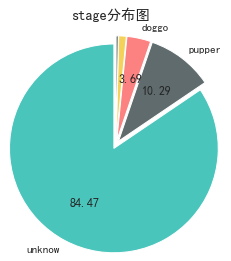

In [124]:
pie_plot(dog_melt.stage.fillna('unknow'))

pupper     212
doggo       76
puppo       24
floofer      8
Name: stage, dtype: int64

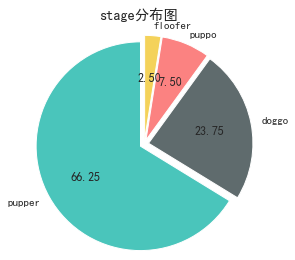

In [125]:
pie_plot(dog_melt.stage)

#### 品种分布情况

golden_retriever      147
Labrador_retriever     98
Pembroke               88
Chihuahua              83
pug                    57
                     ... 
water_bottle            1
minibus                 1
revolver                1
swab                    1
park_bench              1
Name: breed, Length: 376, dtype: int64

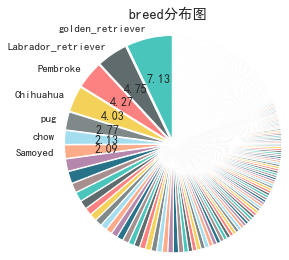

In [126]:
pie_plot(dog_melt.breed)

#### 关于狗狗的微博占比情况

is_dog       1235
maybe_dog     505
not_dog       321
Name: is_dog, dtype: int64

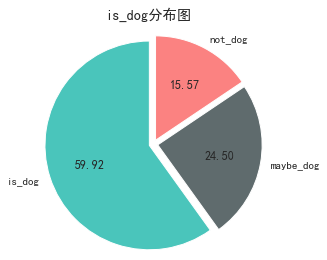

In [127]:
pie_plot(dog_melt.is_dog)

#### 评分的分布情况

high      1218
middle     761
low         81
Name: rate_degree, dtype: int64

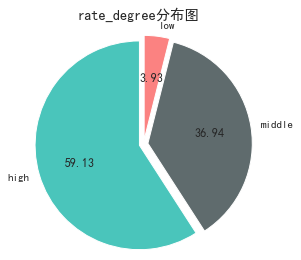

In [128]:
pie_plot(dog_melt.rate_degree)

12    475
10    432
11    417
13    285
9     151
     ... 
3      19
4      15
2       9
1       4
15      1
Name: rating_numerator, Length: 15, dtype: int64

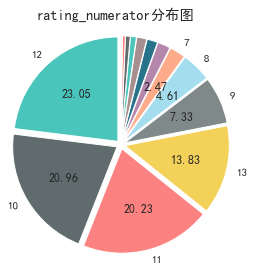

In [129]:
pie_plot(dog_melt.rating_numerator)

#### 性别分布

male      1048
unknow     657
female     356
Name: sex, dtype: int64

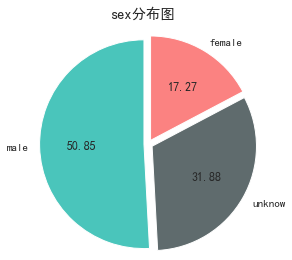

In [130]:
pie_plot(dog_melt.sex)

### 2.3名字词云

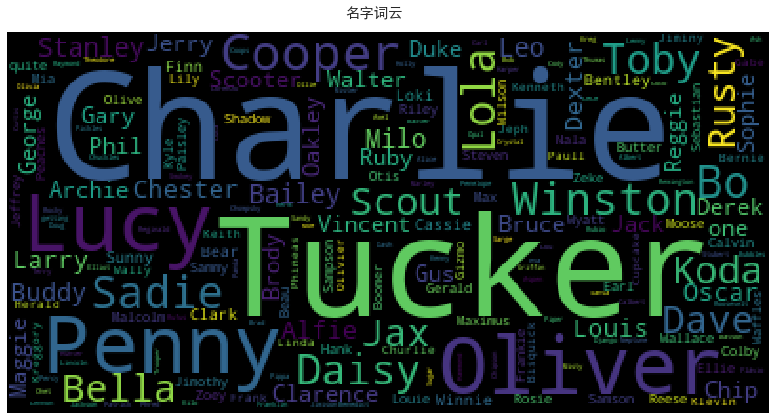

In [131]:
plt.subplots(figsize = (15,7))

stopwords = set(STOPWORDS)
stopwords.add('None')

wc = WordCloud(stopwords=stopwords,collocations=False)
wc.generate(str(list(dog_melt.name.dropna())).replace('\'',' '))
plt.imshow(wc)
plt.axis('off')
plt.suptitle('名字词云', fontweight='bold', y=.93);

### 2.4数值数据一览

#### 点赞量与转发量

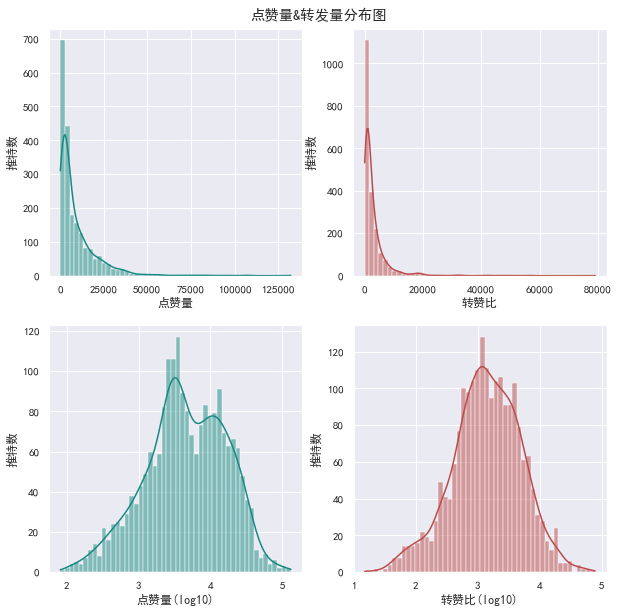

In [132]:
fig,ax = plt.subplots(2,2,figsize = (10,10))

sns.histplot(dog_melt.favorite_count,ax = ax[0,0],color=ui_dark[0],bins = 50,kde = 1)
(ax[0,0]).set_xlabel('点赞量')
(ax[0,0]).set_ylabel('推特数')
sns.histplot(np.log10(dog_melt.favorite_count),ax = ax[1,0],color=ui_dark[0],kde = 1,bins = 50)
(ax[1,0]).set_xlabel('点赞量(log10)')
(ax[1,0]).set_ylabel('推特数')

sns.histplot(dog_melt.retweet_count,ax = ax[0,1],color=ui_dark[2],bins = 50,kde = 1)
(ax[0,1]).set_xlabel('转赞比')
(ax[0,1]).set_ylabel('推特数')
sns.histplot(np.log10(dog_melt.retweet_count),ax = ax[1,1],color=ui_dark[2],kde = 1,bins = 50)
(ax[1,1]).set_xlabel('转赞比(log10)')
(ax[1,1]).set_ylabel('推特数')

plt.suptitle('点赞量&转发量分布图', fontweight='bold', y=.91);

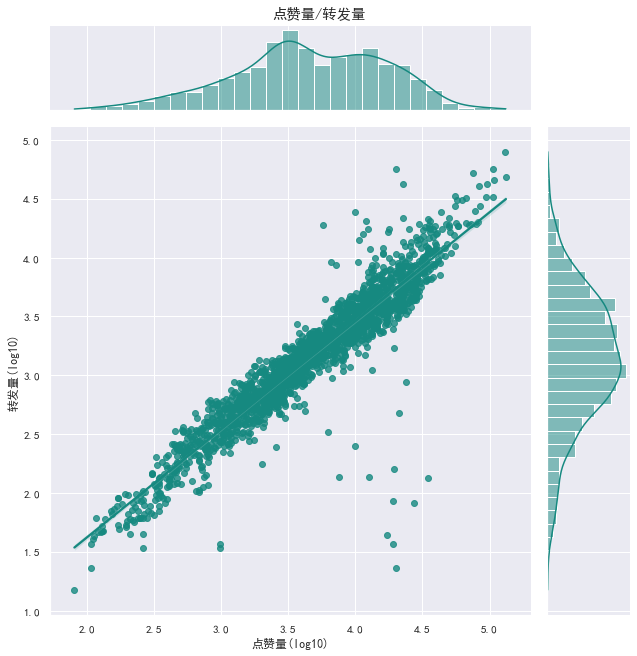

In [133]:
ax = sns.jointplot(x = np.log10(dog_melt.favorite_count),
             y = np.log10(dog_melt.retweet_count),
             color = ui_dark[0],
             kind = 'reg',
             height = 9)

ax.set_axis_labels("点赞量(log10)", "转发量(log10)")

plt.suptitle('点赞量/转发量',y=1.01);

可以看出
- 1.点赞量和转发量呈很强的线性关系
- 2.点赞量分布明显左偏，绝大部分集中分布在200-5000区间，进行对数转化后还是明显不呈正态分布

#### 转赞比

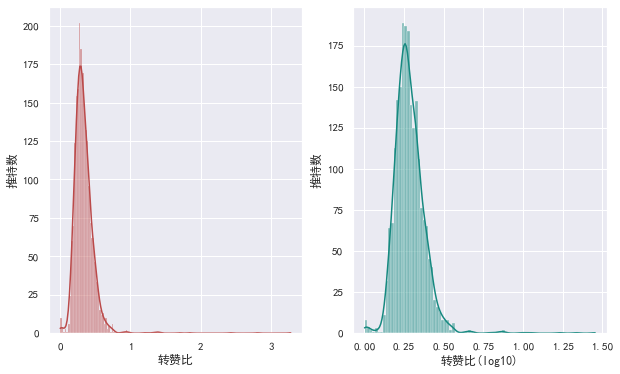

In [134]:
fig,(ax1,ax2 )= plt.subplots(1,2, figsize = (10,6))
sns.histplot(dog_melt.retweet_like,ax = ax1,color =  ui_dark[2],kde = 1)
ax1.set_xlabel('转赞比')
ax1.set_ylabel('推特数')
sns.histplot(np.log1p(dog_melt.retweet_like),ax = ax2,color =  ui_dark[0],kde=1)
ax2.set_xlabel('转赞比(log10)')
ax2.set_ylabel('推特数');

推特转赞比左偏，取对数后近似于正态分布

### 2.5变量相关性

In [135]:
dog_melt.drop('rating_denominator',axis = 1).corr()

,tweet_id,rating_numerator,favorite_count,retweet_count,retweet_like
tweet_id,1.000000,0.543016,0.655977,0.404363,-0.304268
rating_numerator,0.543016,1.000000,0.417080,0.310339,-0.201337
favorite_count,0.655977,0.417080,1.000000,0.858957,-0.071669
retweet_count,0.404363,0.310339,0.858957,1.000000,0.316499
retweet_like,-0.304268,-0.201337,-0.071669,0.316499,1.000000


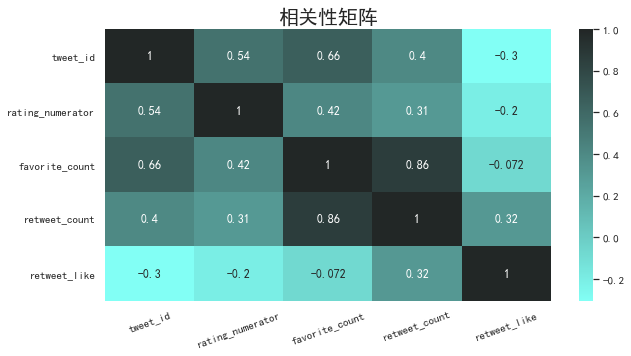

In [136]:
plt.subplots(figsize = (10,5))
ax = sns.heatmap(dog_melt.drop('rating_denominator',axis = 1).corr(),annot=True,cmap=sequential_ui)
ax.set_ylim([5, 0])
plt.yticks(rotation = 360)
plt.xticks(rotation = 20)
plt.title('相关性矩阵',fontweight = 'bold',fontsize = 20);

- 点赞量和转发量之间呈正相关关系，这很容易理解，并且这并无太大意义
- 推特id和点赞量之间呈正相关关系，推特id是按照时间递增的，这说明随着时间的推移，推特越来越受欢迎
- 评分与点赞量之间并不呈显著的正相关关系
- 点赞量与转赞比之间竟然没有关系，这让我很惊讶

### 2.6加入时间因素的数值变量变化趋势

In [137]:
dog_melt['month'] = dog_melt.timestamp.dt.month+dog_melt.timestamp.dt.year*100

In [138]:
def barplot_per_value(var, value, method, title = None,dog_melt = dog_melt):
    '''创建条形图，变量说明：
        var：根据哪个变量来进行分类，最好传入分类数据
        value：要统计的变量
        method：统计方法，如'mean','sum','count','max','min'
        title：标题
        dog_melt：目标数据集
        '''
    plt.subplots(figsize = (12,5))
    data = dog_melt.groupby(var)[value].agg(method).reset_index()
    ax = sns.barplot(data = data,
                x = data.columns[0],
                y = data.columns[1],
                color = ui_dark[1])
    sns.despine()#去除边线

    plt.xticks(rotation = 20)
    plt.suptitle(title)

#### 每月推特量

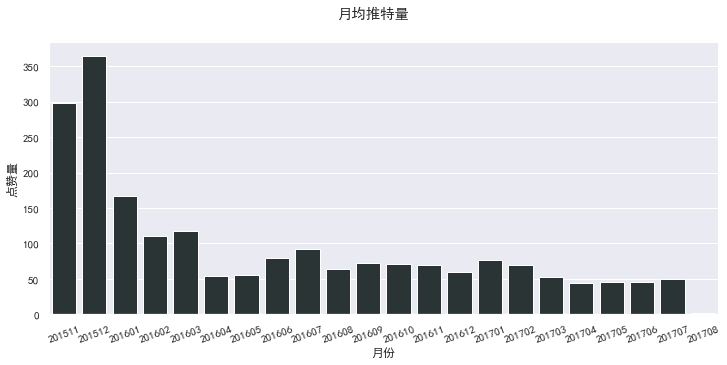

In [139]:
barplot_per_value('month','favorite_count', 'count',title = '月均推特量')
plt.xlabel('月份')
plt.ylabel('点赞量');

##### 你不如以前勤快了
- 15年11月到12月发推非常频繁，保持了每月300条的更新
- 16年1月至4月逐步减少，在第4月时已减少至每月50条水平
- 最后基本保持在每月50-80条左右

#### 每月点赞量

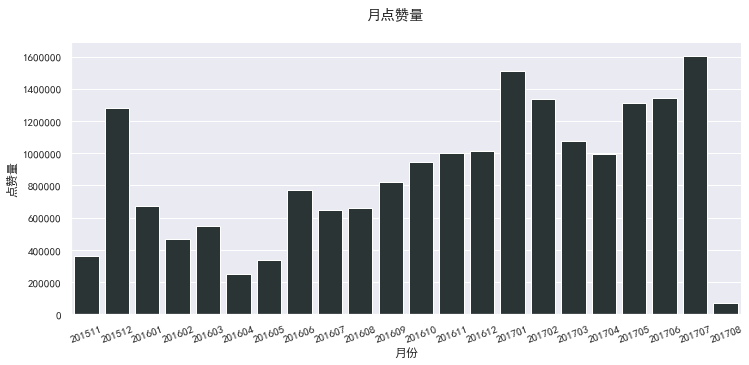

In [140]:
barplot_per_value('month','favorite_count','sum',title = '月点赞量')
plt.xlabel('月份')
plt.ylabel('点赞量');

##### 奇怪的曲线增加了

有趣的情况出现了，前两个月点赞量维持了较高水平的增长。但是推主却决定在第三个月改变发推策略，不在追求量的优势，随之而来的是月点赞量的陡减。而事实证明他们的决定是正确的，随着时间的推移，他们在2016年4月开始触底反弹，并且于2017年1月用70条推文超过之前每月300+推文才能获得的月均点赞量

#### 每月平均推特点赞量

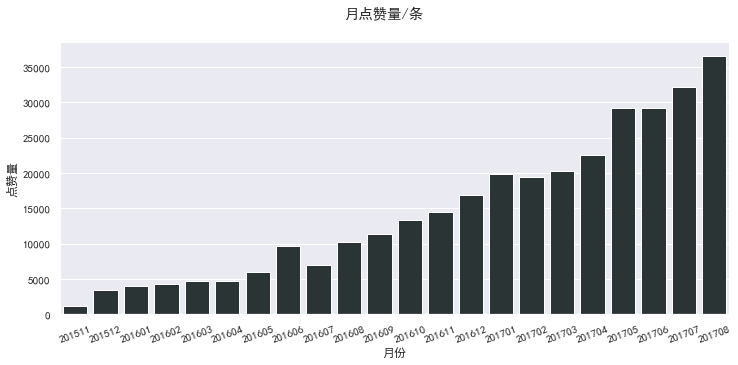

In [141]:
barplot_per_value('month','favorite_count','mean',title = '月点赞量/条')
plt.xlabel('月份')
plt.ylabel('点赞量');

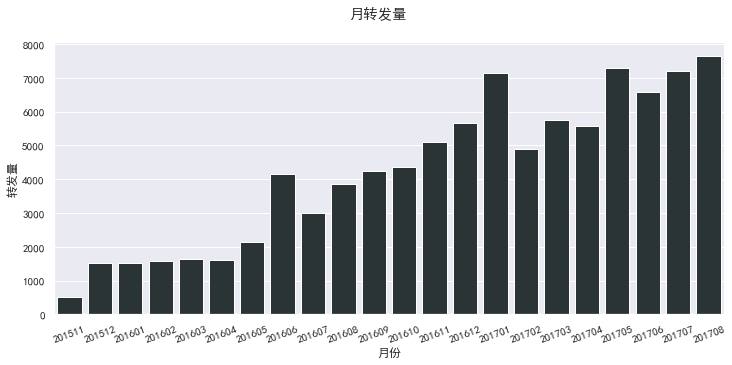

In [142]:
barplot_per_value('month','retweet_count','mean',title = '月转发量')
plt.xlabel('月份')
plt.ylabel('转发量');

##### 每条推特越来越受欢迎——是有意为之还是被迫的妥协？

每条推文的平均点赞量就很能说明问题了，每月推文平均点赞量基本随着时间的推移在递增。

我们可以猜测一下原因：每天大量频繁的更新受限于推主有限的精力和有限的推特素材与灵感，这两者的逼近极限都可能导致推文质量的下降，这种模式不可能长久，最终必然会走精品路线。并且对粉丝来说他们也不希望大量的推特轰炸，每天10+的推特量实在是有点多了

#### 数据一览——点赞量/转发量/转赞比

In [143]:
df_mid = dog_melt.copy()

#提取retweet_like的7日移动平均值
df_mid['date'] = df_mid.timestamp.dt.date
df_mid = df_mid.groupby(['date'])['retweet_like'].agg(np.mean).reset_index()
df_mid['date'] = pd.to_datetime(df_mid.date)
df_mid['retweet_like'] = df_mid.retweet_like.rolling(window=7).mean()

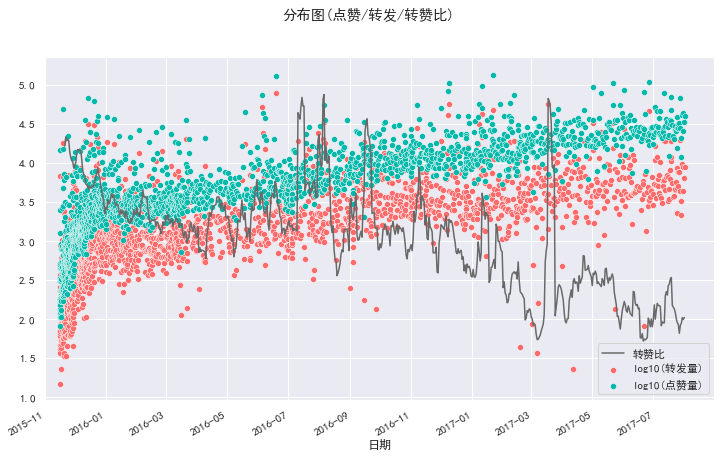

In [144]:
fig,ax = plt.subplots(1,1,figsize = (12,7))
sns.scatterplot(data = dog_melt,x = 'timestamp',y = np.log10(dog_melt.retweet_count),ax = ax,color = '#FF6A6A',label = 'log10(转发量)')
sns.scatterplot(data = dog_melt,x = 'timestamp',y = np.log10(dog_melt.favorite_count),ax = ax,label = 'log10(点赞量)')
sns.lineplot(x =df_mid.date,y =df_mid.retweet_like*10,color = '#696969',label = '转赞比')
#fig.legend(labels = ['favorite/retweet','favorite_count','retweet_count'],loc = 'lower right')
#fig.legend(ncol = 3,loc= 'lower right')

fig.autofmt_xdate()#自动设置日期格式
ax.set_xlim([datetime.date(2015,11,1),datetime.date(2017,8,31)])
plt.suptitle('分布图(点赞/转发/转赞比)')
plt.xlabel('日期')
plt.ylabel('');

##### 这太令人吃惊了！
- 每条推特实现点赞量三位数的突破仅仅用了不到2个月，实现4位数的突破用时不到一年，增长趋势近似于指数级的增长。其蹿红的速度可以用神速来形容，
    并且该账号在两年的时间内并没有出现人气下降的危机，仍然是一个在茁壮成长的推特
- 可以看到虽然同样是指数级的增长，但初期的指数明显更大，在16年3月之后大致维持一个较小指数级的增长
- 转赞比呈波动递减的趋势，根据生活经验，没有谁会一直转发同一类型的推特，我们在关注一个推特的初期更加容易转发内容，关注时间越长，同一类型的推特更难让我们有那种被惊艳到迫不及待的转发的情绪，所以波动下降的趋势也就能够理解了


#### 得分随时间的变化

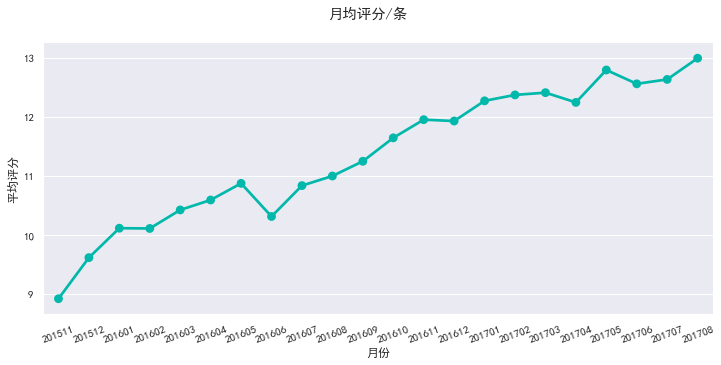

In [145]:
plt.subplots(figsize = (12,5))
data = dog_melt.groupby('month')['rating_numerator'].agg('mean').reset_index()
ax = sns.pointplot(data = data,
             x = data.columns[0],
             y = data.columns[1])
sns.despine()
plt.xticks(rotation = 20)
plt.suptitle('月均评分/条')
plt.xlabel('月份')
plt.ylabel('平均评分');

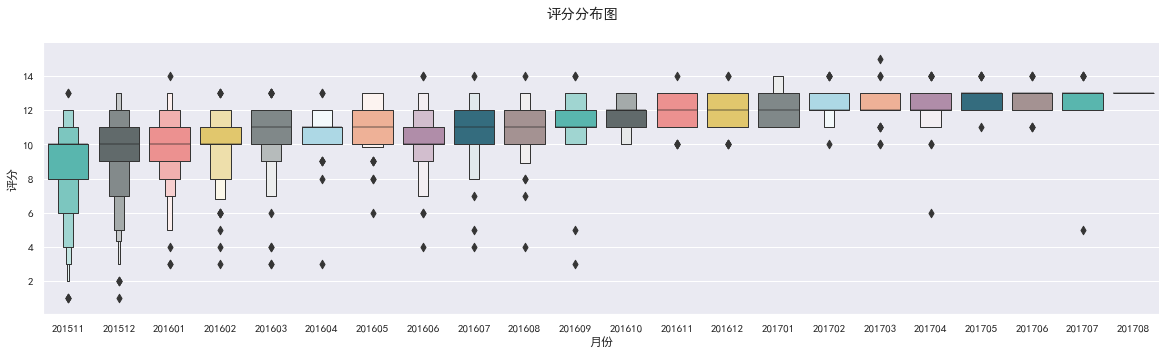

In [146]:
plt.subplots(figsize = (20,5))
sns.boxenplot(data = dog_melt,x = 'month',y = 'rating_numerator',palette=ui_light,)
sns.despine()
plt.suptitle('评分分布图')
plt.xlabel('月份')
plt.ylabel('评分');

##### 越来越高且越来越同质化的评分
- 随着时间的推移狗狗的评分越来越高了,且评分区间在不断的收窄，最后绝大部分评分都落在了12-13区间
- 15年的推特平均评分在10以下，我有理由相信在16年年初推主才开始改变评分策略，形成了独具特色的评分机制（超过10分的评价），看来16年1月对于这个we_rate_dogs来说是不平凡的一个月(评分机制及发推策略的改变)

##### 评分等级占比随时间的变化趋势

In [147]:
#创建数据透视表
pivot_table = dog_melt.pivot_table(columns=['rate_degree'],index=['month'],values = ['tweet_id'],aggfunc={'tweet_id':'count'}).fillna(0).tweet_id

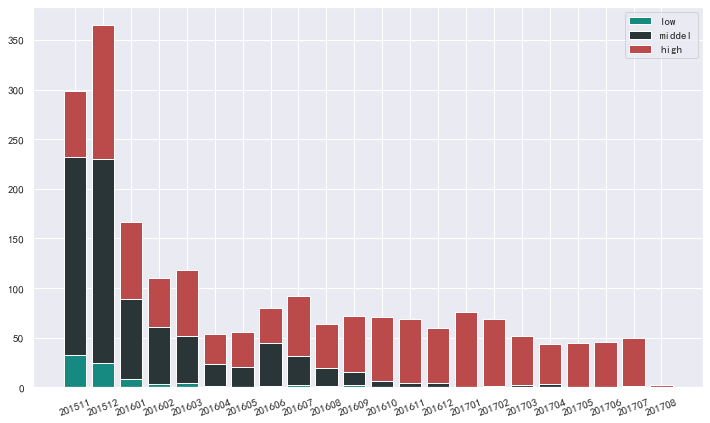

In [148]:
plt.subplots(figsize = (12,7))
ax1 = plt.bar(pivot_table.index.astype(str),pivot_table.low,color = ui_dark[0])
ax2 = plt.bar(pivot_table.index.astype(str),pivot_table.middle,bottom=list(pivot_table.low),color = ui_dark[1])
ax3 = plt.bar(pivot_table.index.astype(str),pivot_table.high,bottom=list(pivot_table.middle+pivot_table.low),color= ui_dark[2])
plt.legend(handles = [ax1,ax2,ax3],labels = ['low','middel','high'])

plt.xticks(rotation = 20);

可以看到高分占比越来越高，到2017年1月时已经没有中低分存在了

### 2.7关于时间我们可以考虑的更多

#### 每日发推时间对点赞量的影响

In [149]:
dog_melt['hours'] = dog_melt.timestamp.dt.hour

In [150]:
#创建透视表
pivot_table = dog_melt.pivot_table(index = 'hours',values = ['favorite_count','retweet_count','retweet_like','tweet_id'],columns=None,
                    aggfunc={'tweet_id':len,'favorite_count':np.mean,'retweet_count':np.mean,'retweet_like':np.mean}).reset_index()

#添加缺失数据
pivot_table = pd.concat([pivot_table,pd.DataFrame({'hours':[7, 8, 9, 10, 11, 12]})]).fillna(0)

#重新排序
pivot_table = pivot_table.sort_values('hours').reset_index(drop = 1)

In [151]:
pivot_table

,favorite_count,hours,retweet_count,retweet_like,tweet_id
0,13841.969582,0,4154.174905,0.329074,263.0
1,8809.345890,1,2929.154110,0.349268,292.0
2,5746.628959,2,2452.678733,0.372711,221.0
3,4532.325843,3,1648.955056,0.370693,178.0
4,3466.808511,4,1268.223404,0.369693,94.0
...,...,...,...,...,...
19,8971.825581,19,2911.627907,0.331469,86.0
20,8639.469136,20,2943.790123,0.355399,81.0
21,7799.560000,21,2788.640000,0.345992,75.0
22,8613.985714,22,2635.971429,0.302487,70.0


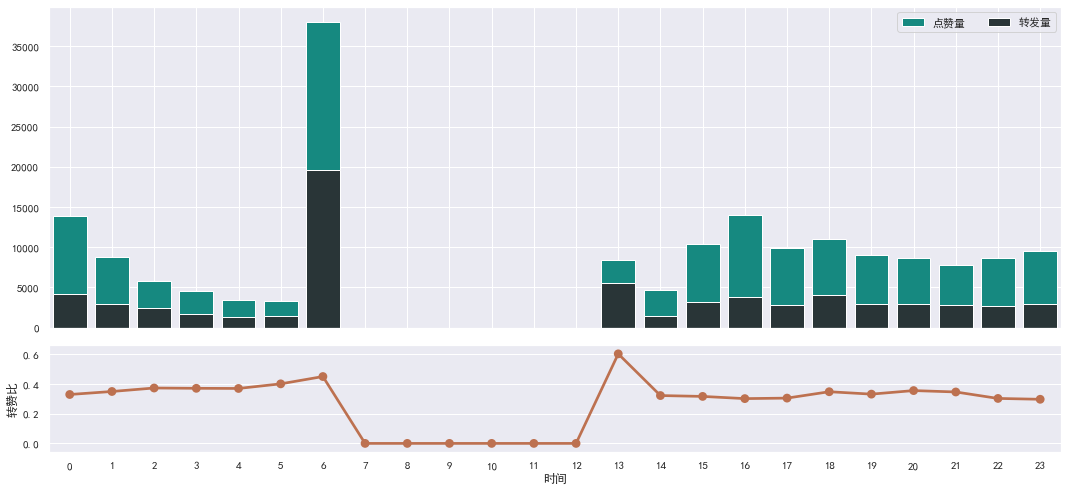

In [152]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (15,7),sharex=True,tight_layout=True,gridspec_kw={'height_ratios': [3, 1]})#gridspec_kw参数参考https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.gridspec.GridSpec.html

ax1.bar(pivot_table.hours,pivot_table.favorite_count,color=ui_dark[0],label = '点赞量')
ax1.bar(pivot_table.hours,pivot_table.retweet_count,color=ui_dark[1],label = '转发量')
ax1.legend(ncol = 2)

sns.pointplot(pivot_table.hours,pivot_table.retweet_like,color = ui_dark[6],ax = ax2)
ax2.set_xlabel('时间')
ax2.set_ylabel('转赞比');

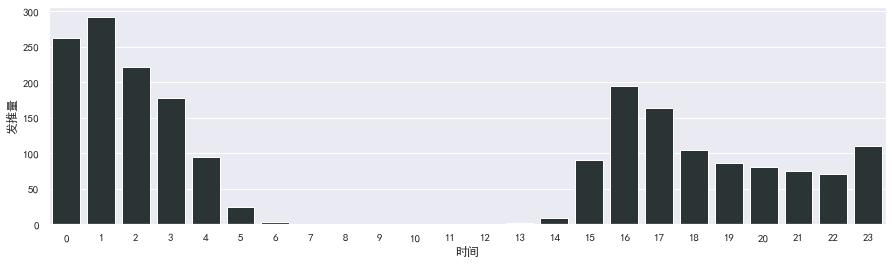

In [153]:
plt.subplots(figsize = (15,4))
sns.barplot(x = pivot_table.hours,y = pivot_table.tweet_id,color=ui_dark[1])
plt.ylabel('count_tweets')
plt.xlabel('时间')
plt.ylabel('发推量');

In [154]:
pivot_table[pivot_table.hours == 6]

,favorite_count,hours,retweet_count,retweet_like,tweet_id
6,37989.666667,6,19654.333333,0.449876,3.0


##### 每日6点发推更火？
- 6点发的推特点赞量爆表，真就这么有效吗？当然不是啦，只有三条微博而已，说明不了什么问题
- 1-5点的发推数据表明，越晚发获得的平均点赞量就越少，推主也更习惯早发而不是临近睡觉了再发
- 推主的作息真的超有规律，两年多愣是只熬夜发了三条推特（6点发的三条）

#### 每周发推时间有什么影响?

In [155]:
dog_melt['dayofweek'] = dog_melt.timestamp.dt.dayofweek

In [156]:
pivot_table = dog_melt.pivot_table(index = 'dayofweek',columns = None, values=['favorite_count','retweet_count','retweet_like','tweet_id'],
                    aggfunc={'favorite_count':np.mean,'retweet_count':np.mean,'retweet_like':np.mean,'tweet_id':'count'}).reset_index()

In [157]:
pivot_table.head(3)

,dayofweek,favorite_count,retweet_count,retweet_like,tweet_id
0,0,8641.103858,2721.210682,0.342971,337
1,1,9694.938710,2896.329032,0.333745,310
2,2,10505.099042,3511.607029,0.345754,313


In [158]:
import matplotlib.gridspec as gridspec

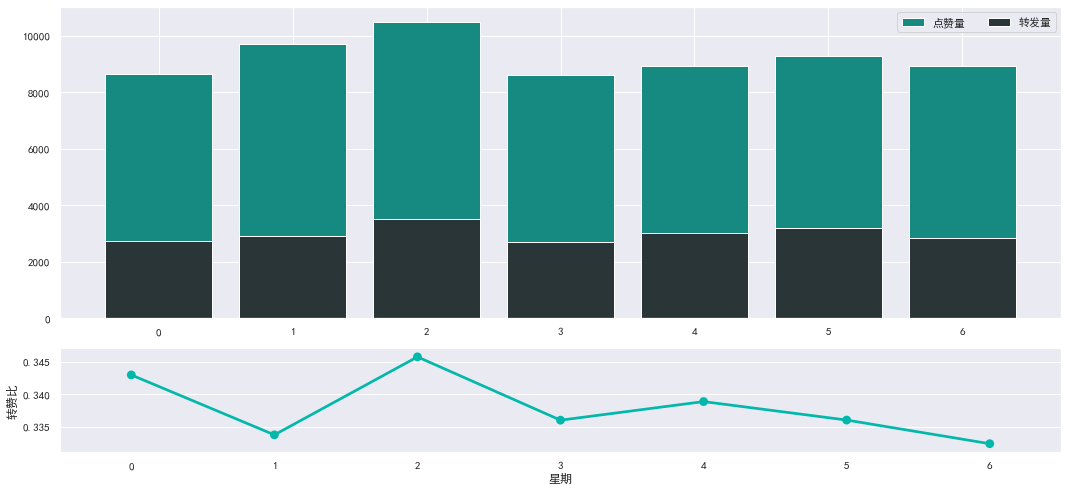

In [159]:
fig = plt.figure(figsize=(15,7),tight_layout=True)
grid = gridspec.GridSpec(2,1,height_ratios=[3,1])
#参考https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/align_labels_demo.html#sphx-glr-gallery-subplots-axes-and-figures-align-labels-demo-py

ax1 = fig.add_subplot(grid[0,0])
ax1.bar(pivot_table.dayofweek,pivot_table.favorite_count,color = ui_dark[0],label = '点赞量')
ax1.bar(pivot_table.dayofweek,pivot_table.retweet_count,color = ui_dark[1],label= '转发量')
ax1.legend(ncol = 2)

ax2 = fig.add_subplot(grid[1,0])
sns.pointplot(x = pivot_table.dayofweek,y = pivot_table.retweet_like,ax = ax2)
ax2.set_xlabel('星期')
ax2.set_ylabel('转赞比');

##### 星期几与点赞量.转发量.转赞比均无明显关系
- 可以看出，虽然存在波动，但波动范较小且无明显规律

### 2.8关于一些分类数据对粉丝喜爱程度的影响

#### 喜欢拉布拉多还是哈士奇？——品种的影响

In [160]:
df_mid = dog_melt[dog_melt.is_dog == 'is_dog'].pivot_table(index = 'breed',columns = None,
                    values = ['favorite_count','retweet_like','tweet_id','rating_numerator'],
                    aggfunc={'rating_numerator':[np.mean,np.std],'favorite_count':[np.mean,np.sum],'retweet_like':np.mean,'tweet_id':'count'}).reset_index()

In [161]:
#平均点赞量前十
df_mid.sort_values(('favorite_count','mean'),ascending = 0).head(10)

breed favorite_count           rating_numerator  \
                                       mean       sum             mean   
32       Irish_water_spaniel   25123.000000   25123.0        12.000000   
52                    Saluki   23996.250000   95985.0        12.500000   
103          standard_poodle   20860.833333  125165.0        11.166667   
22            French_bulldog   19330.523810  405941.0        11.142857   
71   black-and-tan_coonhound   16952.500000   33905.0        10.500000   
85     flat-coated_retriever   16731.625000  133853.0        10.875000   
13                  Cardigan   15885.312500  254165.0        11.625000   
19          English_springer   15396.300000  153963.0        11.000000   
37                  Leonberg   14870.000000   44610.0        11.333333   
53                   Samoyed   14442.666667  389952.0        11.703704   

              retweet_like tweet_id  
          std         mean    count  
32        NaN     0.239342        1  
52   1.000000     0.231612        4  
103  2.316607     0.597591        6  
22   1.824437     0.277916       21  
71   4.949747     0.312262        2  
85   2.531939     0.271282        8  
13   1.147461     0.331522       16  
19   1.154701     0.275180       10  
37   2.081666     0.290442        3  
53   1.353480     0.397356       27

In [162]:
#发推量前十
df_mid.sort_values(('tweet_id','count'),ascending = 0).head(10)

breed favorite_count            rating_numerator            \
                                  mean        sum             mean       std   
87     golden_retriever   12488.317073  1536063.0        11.585366  1.378564   
47             Pembroke   12252.415584   943436.0        11.454545  1.795795   
35   Labrador_retriever   10172.453333   762934.0        11.266667  1.255618   
15            Chihuahua    9477.222222   511770.0        10.833333  1.920593   
98                  pug    6068.292683   248800.0        10.414634  1.687833   
48           Pomeranian    7443.428571   208416.0        11.250000  1.004619   
53              Samoyed   14442.666667   389952.0        11.703704  1.353480   
79                 chow   11629.814815   314005.0        11.666667  1.037749   
105          toy_poodle    8292.370370   223894.0        11.296296  1.170628   
92             malamute    8556.576923   222471.0        10.961538  1.310901   

    retweet_like tweet_id  
            mean    count  
87      0.307721      123  
47      0.319938       77  
35      0.293083       75  
15      0.399517       54  
98      0.347982       41  
48      0.350285       28  
53      0.397356       27  
79      0.307035       27  
105     0.325571       27  
92      0.316597       26

In [163]:
#发推量前十的狗狗推特数占比
df_mid.sort_values(('tweet_id','count'),ascending = 0).head(10)[('tweet_id','count')].sum()/df_mid[('tweet_id','count')].sum()*100

40.89068825910931

In [164]:
#发推量前十的狗狗点赞量占比
df_mid.sort_values(('tweet_id','count'),ascending = 0).head(10)[('favorite_count','sum')].sum()/df_mid[('favorite_count','sum')].sum()*100

45.35519476987556

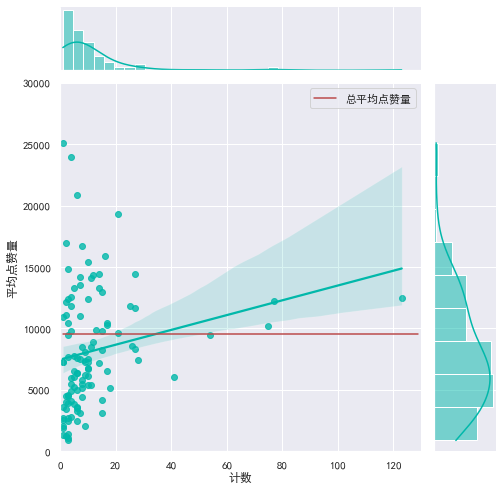

In [165]:
ax1 = sns.jointplot(y = df_mid[('favorite_count', 'mean')],x = df_mid[('tweet_id', 'count')],kind ='reg',height = 7)
ax1 = sns.lineplot(x = np.array(range(130)),
             y = np.array(range(130))/np.array(range(130))*(df_mid['favorite_count','sum'].sum()/df_mid[('tweet_id','count')].sum()),
            color = ui_dark[2],label = '总平均点赞量')
plt.legend()
plt.xlabel('计数')
plt.ylabel('平均点赞量')
plt.xlim([0,130])
plt.ylim([0,30000]);


- 多样性：共有108种不同品种的狗被推特提及，范围还蛮广的，但是推主似乎更加偏爱某些狗狗如金毛、柯基、吉娃娃、八哥、博美等，发推量前十的狗狗总发推数占比达到了40%
- 越热门越稳定：随着发推数增多平均点赞量逐渐收敛
- 那些狗狗更受欢迎：我们看到发推数前三的狗狗平均点赞量均高于平均值，平均点赞量前十的狗狗都是较冷门的狗狗，那么我们是否可以确定某些品种的狗狗平均点赞量显著高于其他狗狗的品种呢？我们需要对发推量最多的狗狗和平均点赞量前十的狗狗做因子方差分析

In [166]:
#转赞比前十
df_mid.sort_values(('retweet_like','mean'),ascending=0).head(10)

breed favorite_count           rating_numerator  \
                                           mean       sum             mean   
103              standard_poodle   20860.833333  125165.0        11.166667   
104           standard_schnauzer    2039.000000    2039.0        12.000000   
102  soft-coated_wheaten_terrier    2032.555556   18293.0         8.777778   
74                        borzoi    5243.800000   26219.0        10.800000   
63                  Walker_hound    6556.800000   32784.0         9.000000   
15                     Chihuahua    9477.222222  511770.0        10.833333   
53                       Samoyed   14442.666667  389952.0        11.703704   
39                   Maltese_dog    3108.666667   46630.0         9.600000   
86               giant_schnauzer   12391.666667   37175.0        12.000000   
96           miniature_schnauzer    4103.750000   16415.0         9.250000   

              retweet_like tweet_id  
          std         mean    count  
103  2.316607     0.597591        6  
104       NaN     0.452182        1  
102  3.032234     0.413993        9  
74   2.489980     0.408672        5  
63   1.732051     0.401979        5  
15   1.920593     0.399517       54  
53   1.353480     0.397356       27  
39   2.261479     0.393136       15  
86   1.732051     0.391840        3  
96   3.095696     0.386281        4

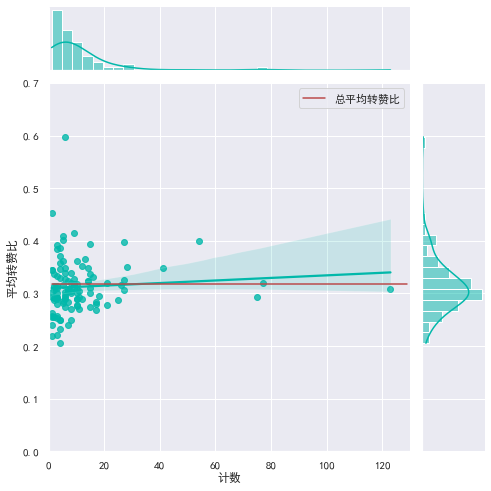

In [167]:
ax1 = sns.jointplot(y = df_mid[('retweet_like', 'mean')],x = df_mid[('tweet_id', 'count')],kind ='reg',height = 7)
ax1 = sns.lineplot(x = np.array(range(130)),
             y = np.array(range(130))/np.array(range(130))*((df_mid[('retweet_like','mean')]*df_mid[('tweet_id','count')]).sum()/df_mid[('tweet_id','count')].sum()),
            color = ui_dark[2],label = '总平均转赞比')
plt.xlabel('计数')
plt.ylabel('平均转赞比')
plt.xlim([0,130])
plt.ylim([0,0.7]);

- 平均转赞比近似正态分布，推特量前3的狗狗转赞比均在总平均值上下波动
- 转战比前10的狗狗均是了冷门狗狗，不过吉娃娃似乎是个例外，我们需要对转赞比前十的狗狗做因子方差分析，看看是否有狗狗的转赞比显著高于平均值

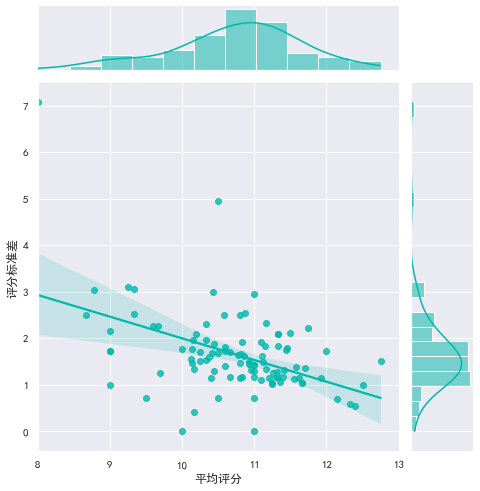

In [168]:
sns.jointplot(x = df_mid[('rating_numerator',  'mean')],y = df_mid[('rating_numerator',   'std')],kind ='reg',height = 7)
plt.xlim([8,13])
plt.xlabel('平均评分')
plt.ylabel('评分标准差');

- 推主的喜好很固定——虽然不同品种的狗平均分不同，但同一个品种的狗评分差异多在2分以内（标准差小于2）
- 对评分更高的品种评价就越统一(标准差越小）
- 评分均值和评分标准差基本符合正太分布

#### 喜欢大狗还是小狗？——对生长状态的分析

推主Marr Nelson在表述狗狗的时候发明了如下词汇：
- Doggo，可以简单的理解为大狗
- Pupper，可以简单的理解为小狗，主要是体型小，一般年龄也比较小
- Puppo，可以简单的理解为青春期的狗狗，介于大狗和小狗之间（也可能是表现得像pupper的doggo）
- Floofer，可以简单的立即为毛好看的狗狗。

这些词汇主要用于形容不同狗狗的生长状态。从词汇构成的角度来看，其主要由一个主词汇和后缀变体组成（例如doggo = dog + go, pupper = pup + per）

unknow     1741
pupper      212
doggo        76
puppo        24
floofer       8
Name: stage, dtype: int64

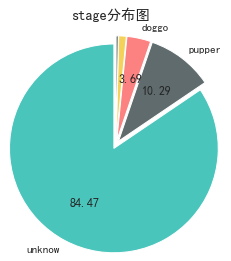

In [169]:
pie_plot(dog_melt.stage.fillna('unknow'))

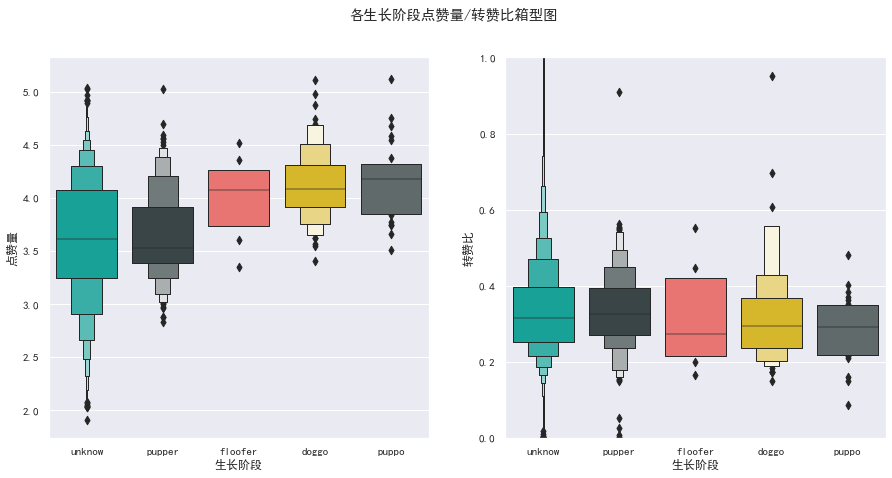

In [170]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
sns.boxenplot(x = dog_melt.stage.fillna('unknow'),y = dog_melt.favorite_count.apply(np.log10),ax = ax1)
ax1.set_xlabel('生长阶段')
ax1.set_ylabel('点赞量')
sns.boxenplot(x = dog_melt.stage.fillna('unknow'),y = dog_melt.retweet_like,ax = ax2)
ax2.set_xlabel('生长阶段')
ax2.set_ylabel('转赞比')
ax2.set_ylim([0,1])
plt.suptitle('各生长阶段点赞量/转赞比箱型图');

- 不同生长阶段的狗在点赞量上竟然有数量级上的差异，但考虑到样本的不均衡性，还需要做进一步的因子方差分析

#### 评分与点赞量/转赞比的关系

虽然评分都是推主的主观评价，但是这并不代表评分和点赞量转发量之间没有客观关系

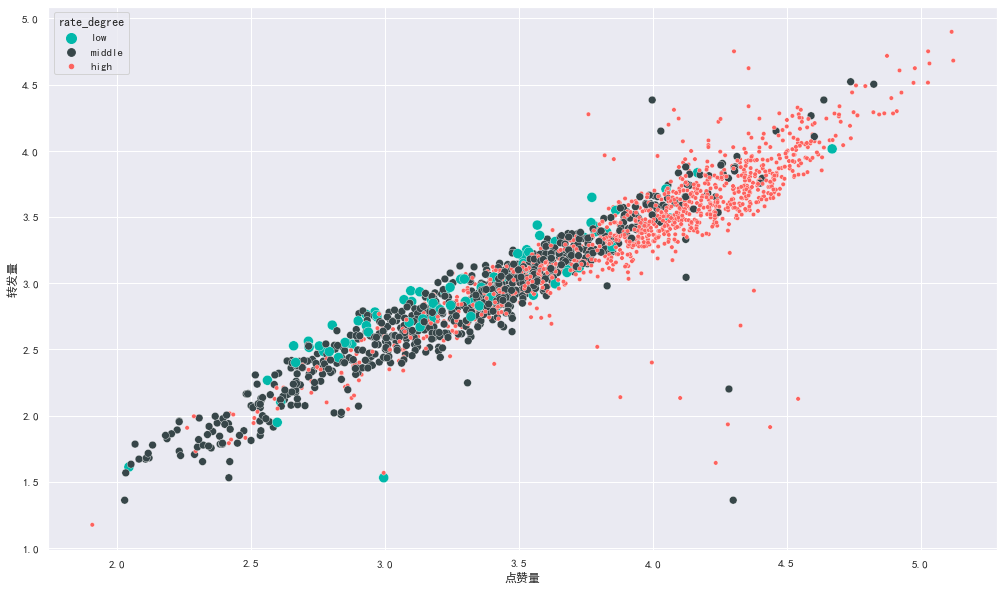

In [171]:
fig = plt.subplots(figsize = (17,10))
sns.scatterplot(data = dog_melt,x = dog_melt.favorite_count.apply(np.log10),y = dog_melt.retweet_count.apply(np.log10),hue = 'rate_degree',
               size = 'rate_degree',sizes = (20,100))
plt.xlabel('点赞量')
plt.ylabel('转发量');

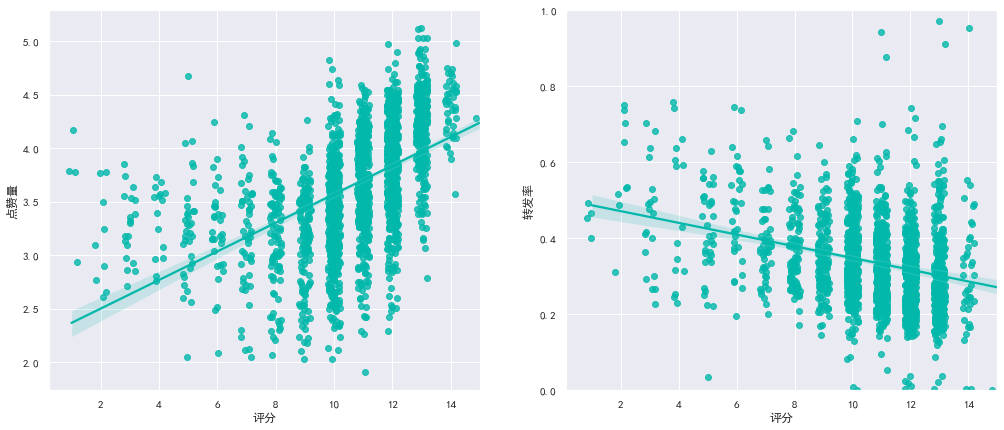

In [172]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (17,7))
sns.regplot(x = dog_melt.rating_numerator,y = dog_melt.favorite_count.apply(np.log10),ax = ax1,x_jitter = .2)
ax1.set_xlabel('评分')
ax1.set_ylabel('点赞量')
sns.regplot(x = dog_melt.rating_numerator,y = dog_melt.retweet_like,ax = ax2,x_jitter = .2)
ax2.set_ylim([0,1])
ax2.set_xlabel('评分')
ax2.set_ylabel('转发率');

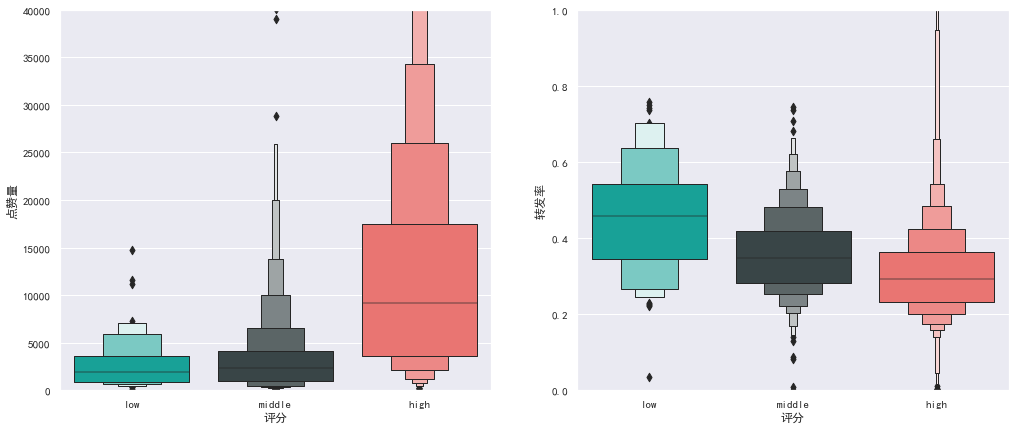

In [173]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (17,7))
sns.boxenplot(x = dog_melt.rate_degree,y = dog_melt.favorite_count,ax = ax1)
ax1.set_ylim([0,40000])
ax1.set_xlabel('评分')
ax1.set_ylabel('点赞量')
sns.boxenplot(x = dog_melt.rate_degree,y = dog_melt.retweet_like,ax = ax2)
ax2.set_ylim([0,1])
ax2.set_xlabel('评分')
ax2.set_ylabel('转发率');

- 评分越高点赞量越高、转发率越低，我推测可能受两个因素影响：

    1.在审美不奇特的情况下，主观评分高的狗狗客观上更加能收到大多数人的喜爱 

    2.由于推主打分策略的改变，打分随着时间逐渐增高，同时粉丝数也随着时间增多，故造成了点赞数随着评分增加的假象,有待进一步的分析
    

- 评分越高，点赞数的分布越广

根据以上的分析结果，还需要进一步的分析，我们只取16年11月以后的数据进行进一步的分析（因为在这之后推主的发推习惯已经改变，且点赞量的变化基本平稳，没有处在上升周期中）

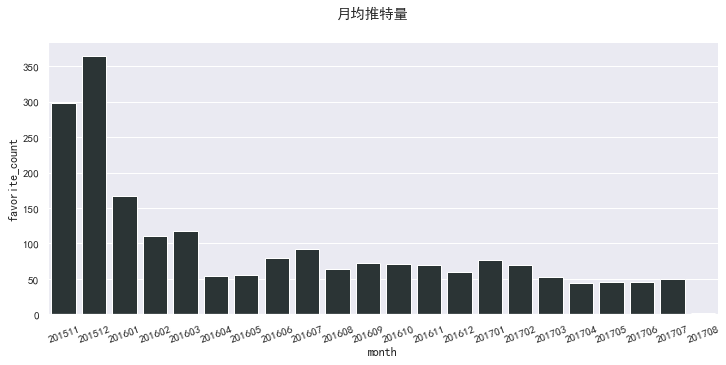

In [174]:
barplot_per_value('month','favorite_count', 'count',title = '月均推特量')

16年3月之后发推频率已平稳

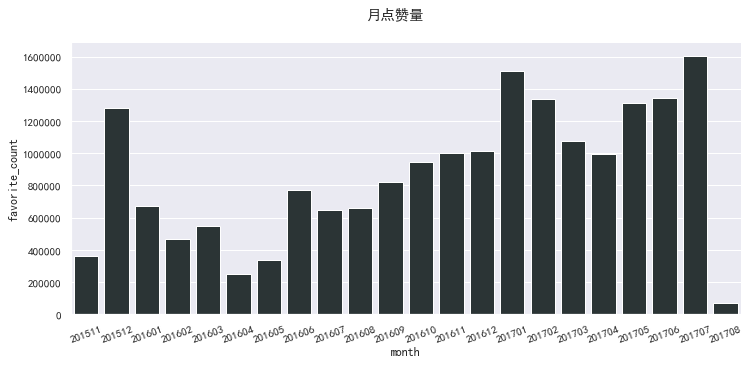

In [175]:
barplot_per_value('month','favorite_count','sum',title = '月点赞量')

16年10月之后点赞量不处在上升周期

In [176]:
df_mid = dog_melt[dog_melt.month>201610]

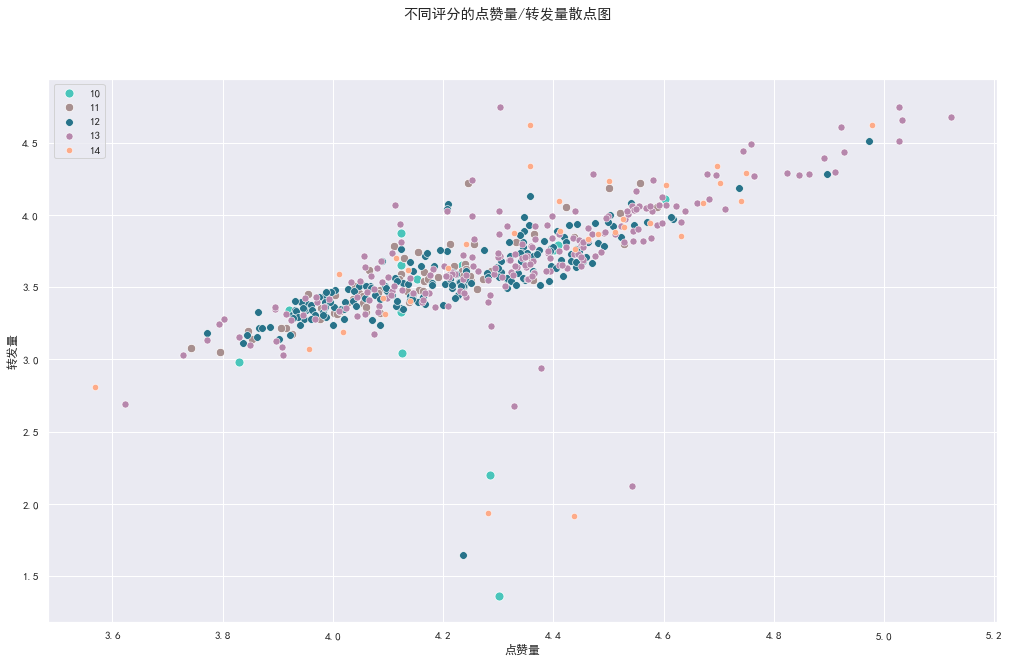

In [177]:
fig = plt.subplots(figsize = (17,10))

for i in [10,11,12,13,14]:
    sns.scatterplot(data = df_mid[df_mid.rating_numerator == i].apply({'rating_numerator':(lambda x:x),'favorite_count':np.log10,'retweet_count':np.log10})
                ,x = 'favorite_count',y = 'retweet_count',color = ui_light[-i%10],label = i,s = (6-i%9)*10+30)
plt.xlabel('点赞量')
plt.ylabel('转发量')
plt.suptitle('不同评分的点赞量/转发量散点图');

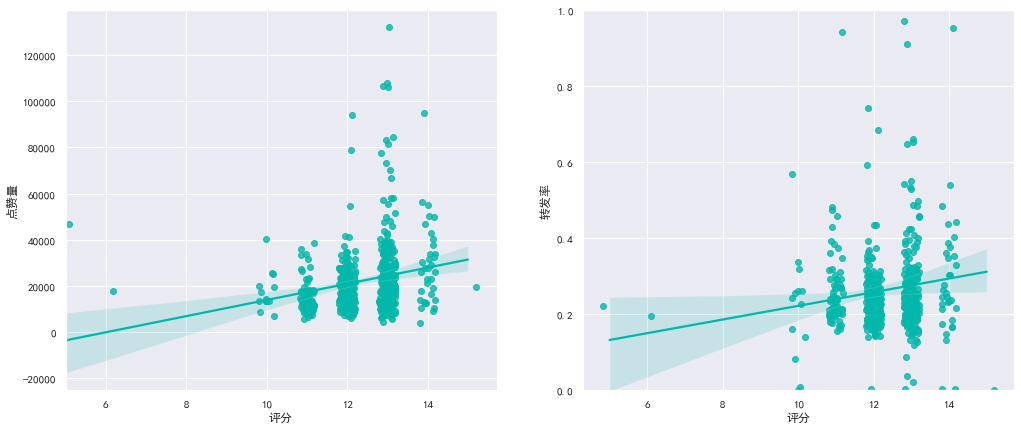

In [178]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (17,7))
sns.regplot(x = df_mid.rating_numerator,y = df_mid.favorite_count,ax = ax1,x_jitter = .2)
ax1.set_xlabel('评分')
ax1.set_ylabel('点赞量')
sns.regplot(x = df_mid.rating_numerator,y = df_mid.retweet_like,ax = ax2,x_jitter = .2)
ax2.set_ylim([0,1])
ax2.set_xlabel('评分')
ax2.set_ylabel('转发率');

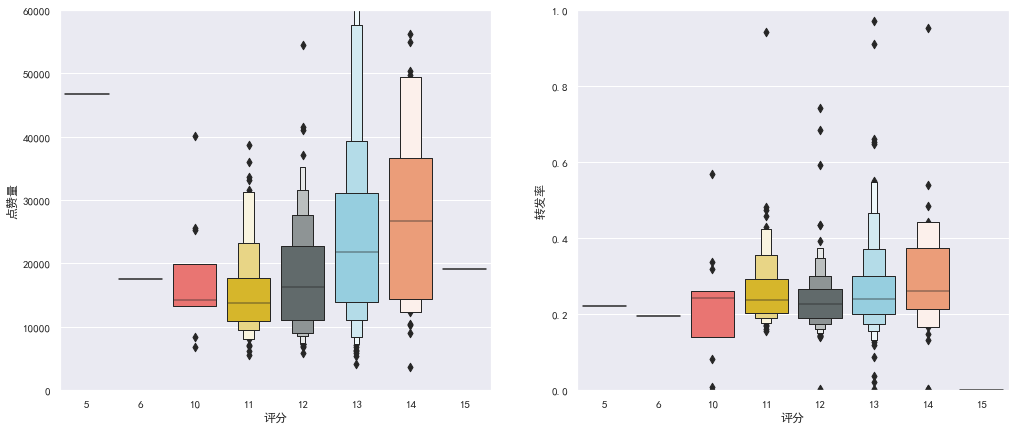

In [179]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (17,7))
sns.boxenplot(x = df_mid.rating_numerator,y = df_mid.favorite_count,ax = ax1)
ax1.set_ylim([0,60000])
ax1.set_xlabel('评分')
ax1.set_ylabel('点赞量')
sns.boxenplot(x = df_mid.rating_numerator,y = df_mid.retweet_like,ax = ax2)
ax2.set_ylim([0,1])
ax2.set_xlabel('评分')
ax2.set_ylabel('转发率');

##### 在排除时间因素的影响之后我们的发现：
- 的确，评分越高点赞量越高，且评分越高点赞量的分布越广
- 评分和转发率的关系由上面的负相关转变为了正相关，看来评分越高的狗狗的确更加讨喜,但这个相关性并不明显，11、12、13分段的转赞比分布基本相同
- 这个阶段已经没有低分的存在了，全员10+

#### 推特主题的影响（是否是狗）

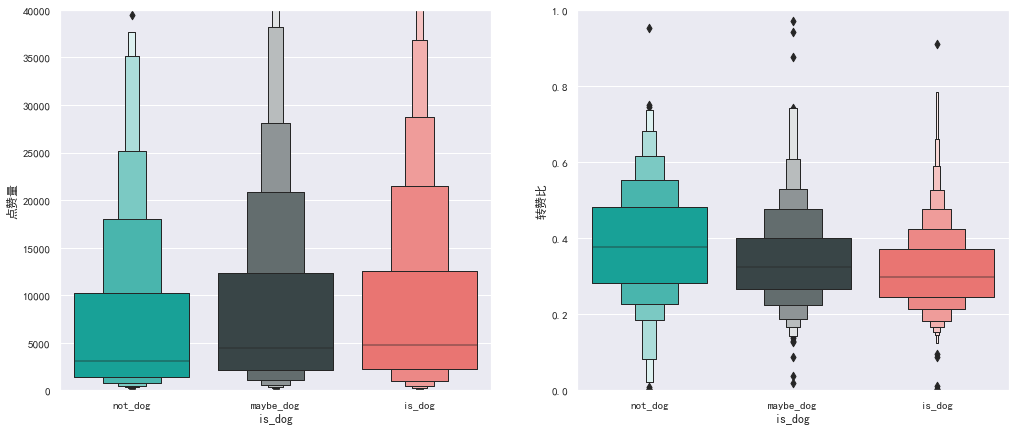

In [180]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (17,7))
sns.boxenplot(x = dog_melt.is_dog,y = dog_melt.favorite_count,ax = ax1)
ax1.set_ylim([0,40000])
ax1.set_ylabel('点赞量')
sns.boxenplot(x = dog_melt.is_dog,y = dog_melt.retweet_like,ax = ax2)
ax2.set_ylim([0,1])
ax2.set_ylabel('转赞比');

- 关于狗的推特比非狗的推特获得的点赞要高，如果排除推特运营初期的低分推特的话这个趋势应该会更加明显
- 转赞比上来说是狗的推特明显比非狗更小且分布区间更窄，这其实可以理解：

    1.关于狗的推特比非狗的推特多出许多，根据中心极限定理，样本越多越收敛
    
    2.推特运营前期绝大部分是关于狗的推特，而在这一时期由于粉丝数量还不多所以这些推特所获得的的点赞也就越少进而拉低整体的评分
- 总的趋势不明显

由于上图的趋势太不明显了，为了得到更加明显的趋势，我将只取2016年10月以后的数据进行研究

In [181]:
df_mid = dog_melt[dog_melt.month>201610]

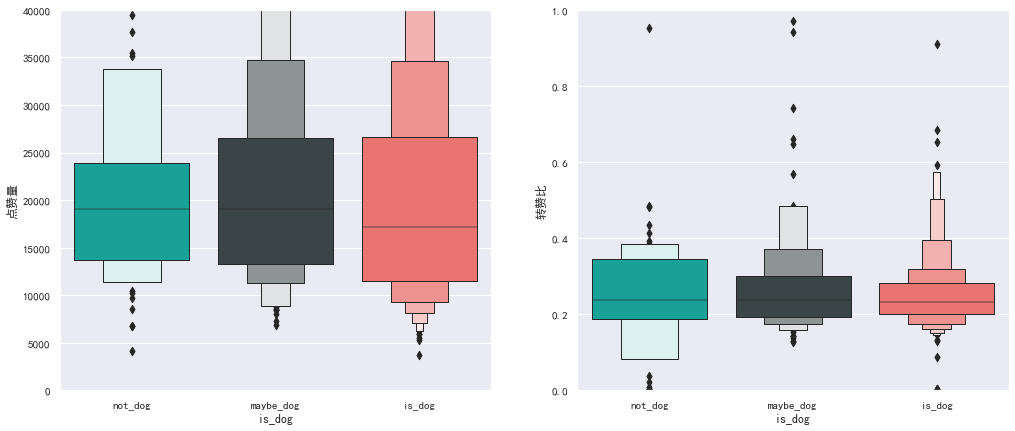

In [182]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (17,7))
sns.boxenplot(x = df_mid.is_dog,y = df_mid.favorite_count,ax = ax1)
ax1.set_ylim([0,40000])
ax1.set_ylabel('点赞量')
sns.boxenplot(x = df_mid.is_dog,y = df_mid.retweet_like,ax = ax2)
ax2.set_ylim([0,1])
ax2.set_ylabel('转赞比');

##### 无明显规律
看起来我上面得出的结论还是有些草率了，推特主题是否是狗无明显的联系

#### 性别的影响

In [183]:
df_mid = dog_melt.apply({'rating_numerator':(lambda x:x),'sex':(lambda x:x),'favorite_count':np.log10,'retweet_like':(lambda x:x)})

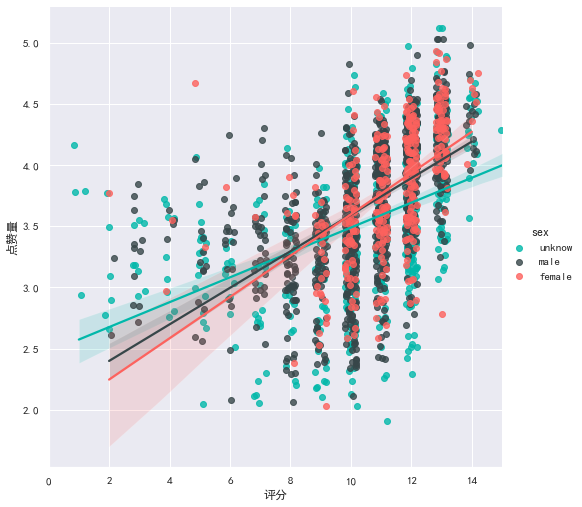

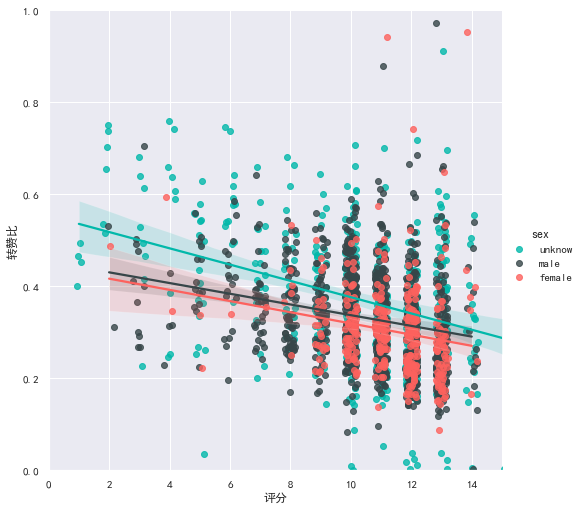

In [184]:
ax1 = sns.lmplot(data = df_mid ,x = 'rating_numerator',y = 'favorite_count',hue = 'sex',height = 7,x_jitter = .2)
ax1.set(xlim = [0,15],xlabel = '评分',ylabel = '点赞量')
ax2 = sns.lmplot(data = df_mid ,x = 'rating_numerator',y = 'retweet_like',hue = 'sex',height = 7,x_jitter = .2)
ax2.set(ylim = [0,1],xlim = [0,15],xlabel = '评分',ylabel = '转赞比');

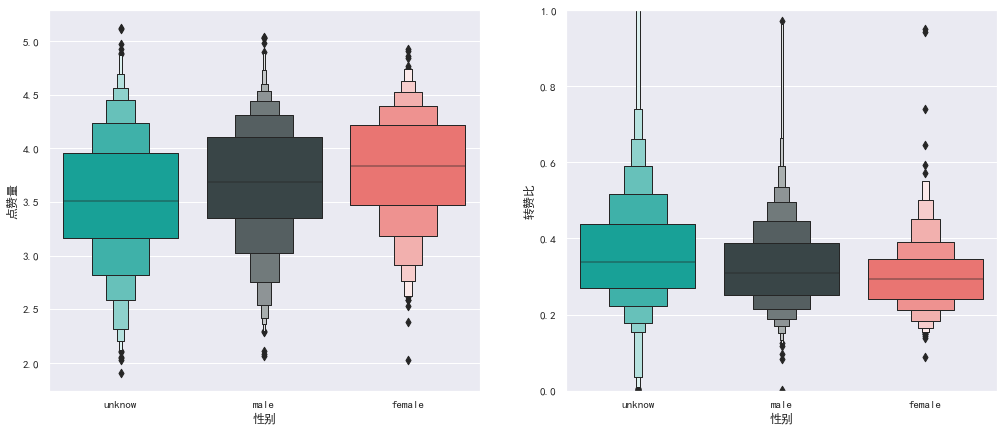

In [185]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (17,7))
sns.boxenplot(x = dog_melt.sex,y = dog_melt.favorite_count.apply(np.log10),ax = ax1)
ax1.set_xlabel ('性别')
ax1.set_ylabel('点赞量')
sns.boxenplot(x = dog_melt.sex,y = dog_melt.retweet_like,ax = ax2)
ax2.set_ylim([0,1])
ax2.set_xlabel ('性别')
ax2.set_ylabel('转赞比');

##### 不对此作深入研究，理由如下：
- 规律不明显，点赞量与转赞比的变化与性别的关系不明显，很有可能得出置信度较低的结论
- 如果强行对有关的趋势做出解释的话，可能会像上面一样得到比较偏激的解释（试想该如何解释母狗平均点赞量比公狗高20%？）

## 3.统计学检验——我们的结论是否可信

### 3.1对发推量前10的狗狗的点赞量做单因素方差分析(One-Way ANOVA)

- 零假设（H<sub>0</sub>）：这10个品种的狗狗的总体的点赞量的平均数是一致的，即μ1=μ2=...=μ9=μ10（μ<sub>n</sub>为各样本平均值）
- 备择假设（H<sub>1</sub>）是：这10个品种中至少有两个品种的平均数不一致。

进行方差分析有三个前提条件：
- 总体服从正分布；
- 样本之间的方差齐性；
- 每个样本独立的独立性。

对于以上三个假设：
- 我们能确认每个样本之间是独立存在的
- 虽然点赞量偏移严重，取对数后也不怎么正太，但是为了稳妥起见，我们还是进行一次正态性的检验
- 我们需要对不同品种的点赞量进行方差齐性检验

如果以上三个假设条件中任意一个不成立，我们就不能用[参数性的单因素方差分析](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)，而需要转而使用[Kruskal-Wallis 单因子方差分析](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal)，由于假设H具有卡方分布，因此每组中的样本数量一定不能太小。典型规则是每个样本必须至少进行5次测量。

在所有的假设检验中，我们所有的置信水平都选择95%，也即α值为0.05。

In [186]:
#生成关于狗狗微博数据的数据透视表
df_mid = dog_melt[dog_melt.is_dog == 'is_dog'].pivot_table(index = 'breed',columns = None,
                    values = ['favorite_count','retweet_like','tweet_id','rating_numerator'],
                    aggfunc={'rating_numerator':[np.mean,np.std],'favorite_count':[np.mean,np.sum],'retweet_like':np.mean,'tweet_id':'count'}).reset_index()

#### 正态性检验
- H<sub>0</sub>：取对数后的点赞量呈现正态分布（取对数存在一些问题，有可能导致对数化后的数据与原始数据）
- H<sub>1</sub>: 取对数后的点赞量不符合正态分布
- 置信水平：95%

In [187]:
s,p = stats.normaltest(dog_melt.favorite_count.apply(np.log10))

if p < 0.05:
    print('拒绝零假设，不符合正态分布')
else:
    print('接受零假设')

拒绝零假设，不符合正态分布


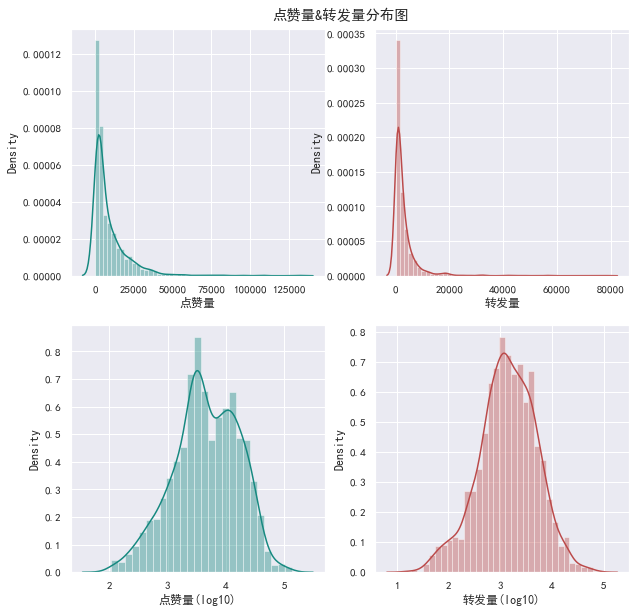

In [188]:
fig,ax = plt.subplots(2,2,figsize = (10,10))

sns.distplot(dog_melt.favorite_count,ax = ax[0,0],color=ui_dark[0],axlabel='点赞量')
sns.distplot(np.log10(dog_melt.favorite_count),ax = ax[1,0],color=ui_dark[0],axlabel='点赞量(log10)')

sns.distplot(dog_melt.retweet_count,ax = ax[0,1],color=ui_dark[2],axlabel='转发量')
sns.distplot(np.log10(dog_melt.retweet_count),ax = ax[1,1],color=ui_dark[2],axlabel='转发量(log10)')

plt.suptitle('点赞量&转发量分布图', fontweight='bold', y=.91);

看来的确不符合正太分布

#### 样本方差齐性检验
- 使用方法：Levene检验
- H<sub>0</sub>：所有组别来自方差一致的总体，我们选择零假设
- H<sub>1</sub>：有组别来自方差不一致的总体，拒绝零假设
- 置信水平：95%

In [189]:
favorite_test = [dog_melt[dog_melt.breed == i]['favorite_count'] for i in 
         df_mid.sort_values(('tweet_id','count'),ascending = 0).head(10).breed]

In [190]:
s,p = stats.levene(*favorite_test)

if p < 0.05:
    print('拒绝零假设，样本不符合方差齐性')
else:
    print('接受零假设，样本方差齐性')

接受零假设，样本方差齐性


取对数后的点赞量不符合正态分布，未取对数各分组样本之间方差齐性，故使用非参数的[Kruskal-Wallis H检验](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal)

#### Kruskal-Wallis H检验
- H<sub>0</sub>：所有组别来自同一个概率分布，我们选择零假设
- H<sub>1</sub>：有组别来自不同的分布，拒绝零假设
- 置信水平：95%

In [191]:
H,p = stats.kruskal(*favorite_test)

if p < 0.05:
    print('拒绝零假设，有样本不同的概率分布')
else:
    print('接受零假设，样本来自于同一个概率分布')

拒绝零假设，有样本不同的概率分布


若非参数的H检验拒绝了零假设，我们需要进行后续检验，以确定具体是那些组均值不同。这里我们采用[Dunn's Test](https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_dunn/)([参考](https://stats.stackexchange.com/questions/108958/kruskal-wallis-test-is-not-significant-but-some-of-the-mann-whitney-comparisons/108966#108966))

#### 后续检验 Dunn's检验
- 零假设H<sub>0</sub>：观察到从样本1中随机抽取的值大于样本2中随机抽取的值的几率为0.5（也即两样本的均值相同）
- 备择假设H<sub>1</sub>：观察到从样本1中随机抽取的值大于样本2中随机抽取的值的几率不为0.5，也即两样本的均值不相同
- 我们用于执行这项检验的函数会返回一个包含P值的Dataframe，供我们判断有没有对样本对的检验能够成功拒绝零假设，我们依然选择0.05作为置信域

In [192]:
#数据准备
top10_list = list(df_mid.sort_values(('tweet_id','count'),ascending = 0).head(10).breed)

df_temp= dog_melt[(dog_melt.breed.apply(lambda x : 1 if x in top10_list else 0)).astype(bool)][['breed','favorite_count']]

In [193]:
df_temp.head(1)

,breed,favorite_count
7,chow,449


In [194]:
# 参考链接
# https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_dunn/
result_dunn = sp.posthoc_dunn(df_temp,'favorite_count','breed')

In [195]:
result_dunn = (result_dunn>0)&(result_dunn<0.05)

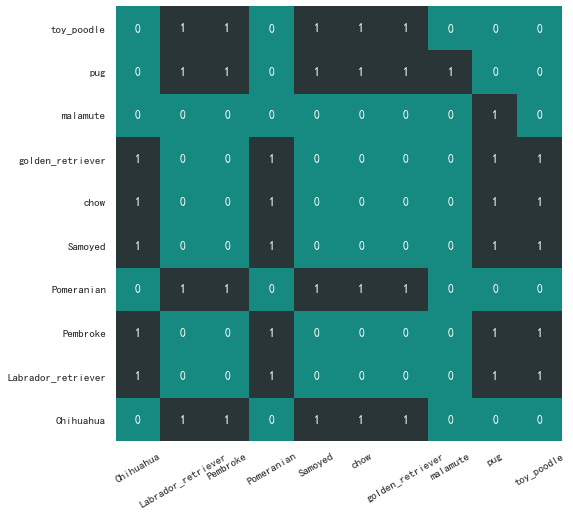

In [196]:
plt.subplots(figsize = (8,8))
sns.heatmap(result_dunn ,cbar=False,fmt="d",annot=True,cmap = [ui_dark[0],ui_dark[1]])
plt.xlim([0,10])
plt.ylim([0,10])
plt.xticks(rotation = 30);

In [197]:
df_temp.groupby('breed')['favorite_count'].apply(np.mean).reset_index().sort_values('favorite_count')

,breed,favorite_count
8,pug,6225.385965
9,toy_poodle,6667.871795
3,Pomeranian,8103.210526
7,malamute,8691.666667
0,Chihuahua,8797.939759
5,chow,10292.931818
2,Pembroke,11270.022727
1,Labrador_retriever,12167.928571
6,golden_retriever,12631.115646
4,Samoyed,13969.860465


- 根据Dunn's检验的结果，我们能够明确在发推量最多的10只狗狗中，Samoyed（萨摩耶）、golden_retriever（金毛）、Labrador_retriever（拉布拉多）、Pembroke（威尔士柯基犬）、chow（松狮）与其他品种的狗的点赞量有统计学差异（点赞量明显高于其他品种），而这几个品种内部则无统计学差异。

#### 效应量的计算
H检验显著，我们还需要知道这个统计结果能在多大程度上说明问题，效应值越大表明这个差异的现象越明显。

针对Kruskal-Wallis检验的η<sub>2</sub>[计算](https://www.zhihu.com/question/281034620/answer/417708436)方法如下：

$$ η^2 = (H-k+1)/(n-k) $$

In [198]:
effect_size = (H-10+1)/(df_temp.shape[0]-10)
print('效应值η^2等于{} '.format(effect_size))

效应值η^2等于0.056239022394102896 


效应量只有0.056，效应很小，影响比较有限

### 3.2平均点赞量前十的狗狗点赞量做单因素方差分析（包含冷门狗狗）

前十的狗狗中有4种点赞量小于5，点赞量数据又不呈正态性和方差齐性，我们重新提取发推量大于5条的狗狗中平均点赞量前十的品种进行检验（因为H检验要求样本数量至少要大于5）,为了体现差异性，我们加入最热门的狗狗中点赞量最高的萨摩耶作为一个参考基准。

In [209]:
df_temp = df_mid[df_mid[('tweet_id','count')]>=5].sort_values(('favorite_count','mean'),ascending=0).head(10)

In [212]:
top_10 = df_temp.breed.tolist()

In [218]:
df_temp = dog_melt[(dog_melt.breed.apply(lambda x:1 if x in top_10 else 0).astype(bool))]

##### 重新提取数据的正态性检验

In [220]:
s,p = stats.normaltest(df_temp.favorite_count.apply(np.log10))
if p <0.05:
    print('拒绝原假设，样本不呈正态分布')
else:
    print('接受原假设，样本呈正态分布')

拒绝原假设，样本不呈正态分布


重新提取数据后依旧不呈正态分布，接下来检验方差齐性

#### 方差齐性检验（Levene检验）
- H<sub>0</sub>：所有组别来自方差一致的总体，我们选择零假设
- H<sub>1</sub>：有组别来自方差不一致的总体，拒绝零假设
- 置信水平：95%

In [221]:
top_10_breed = df_temp.breed.unique()

In [222]:
favorite_test = [df_temp[df_temp.breed == i]['favorite_count'] for i in top_10_breed]

In [224]:
s,p = stats.levene(*favorite_test)
if p<0.05:
    print('拒绝原假设，样本方差不齐性')
else:
    print('接受原假设，样本方差齐性')

接受原假设，样本方差齐性


取对数后的样本不呈正态性，未取对数样本间方差齐性，故采用H检验

#### Kruskal-Wallis H检验
- H<sub>0</sub>：所有组别来自同一个概率分布，我们选择零假设
- H<sub>1</sub>：有组别来自不同的分布，拒绝零假设
- 置信水平：95%

In [225]:
H,p = stats.kruskal(*favorite_test)
if p<0.05:
    print('有组别来自不同的分布，拒绝零假设')
else:
    print('所有组别来自同一个概率分布，我们选择零假设')

所有组别来自同一个概率分布，我们选择零假设


接受零假设意味着我们无法找出点赞量明显高过其他品种的狗狗，看起来发推量最高的狗狗中最受欢迎的品种和平均点赞量最高的狗狗之间的点赞量并无统计学意义上的差别。
- 推主的发推策略可以优先考虑过去的推特中平均点赞量较高（前十）的品种或者选择Samoyed（萨摩耶）、golden_retriever（金毛）、Labrador_retriever（拉布拉多）、Pembroke（威尔士柯基犬）、chow（松狮）等热门品种中平均点赞量较高的品种。

### 3.3对发推量前十的狗狗的转赞比做单因素方差分析

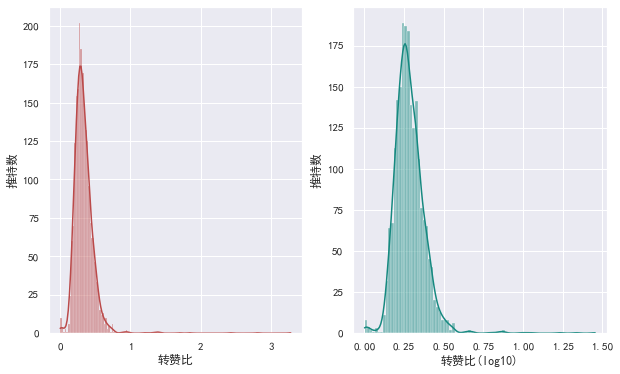

In [226]:
fig,(ax1,ax2 )= plt.subplots(1,2, figsize = (10,6))
sns.histplot(dog_melt.retweet_like,ax = ax1,color =  ui_dark[2],kde = 1)
ax1.set_xlabel('转赞比')
ax1.set_ylabel('推特数')
sns.histplot(np.log1p(dog_melt.retweet_like),ax = ax2,color =  ui_dark[0],kde=1)
ax2.set_xlabel('转赞比(log10)')
ax2.set_ylabel('推特数');

#### 正态性检验
- H<sub>0</sub>：取对数后的点赞量呈现正态分布（取对数存在一些问题，有可能导致对数化后的数据与原始数据）
- H<sub>1</sub>: 取对数后的点赞量不符合正态分布
- 置信水平：95%

In [227]:
s,p = stats.normaltest(dog_melt.retweet_like.apply(np.log10))
if p<0.05:
    print('拒绝零假设，不呈正态分布')
else:
    print('接受零假设，呈正态分布')

拒绝零假设，不呈正态分布


#### 样本方差齐性检验
- 使用方法：Levene检验
- H<sub>0</sub>：所有组别来自方差一致的总体，我们选择零假设
- H<sub>1</sub>：有组别来自方差不一致的总体，拒绝零假设
- 置信水平：95%

In [228]:
top_10 = (df_mid.sort_values(('tweet_id','count'),ascending=0).head(10)).breed.to_list()

In [229]:
df_temp = [dog_melt[dog_melt.breed == i]['retweet_like'] for i in top_10]

In [230]:
s,p = stats.levene(*df_temp)
if p<0.05:
    print('拒绝零假设，方差不一致')
else:
    print('接受零假设，方差一致')

接受零假设，方差一致


取对数后的转赞比不符合正态分布，各品种转赞比之间方差齐次，故使用非参数的Kruskal-Wallis H检验

#### Kruskal-Wallis H检验
- H<sub>0</sub>：所有组别来自同一个概率分布，我们选择零假设
- H<sub>1</sub>：有组别来自不同的分布，拒绝零假设
- 置信水平：95%

In [231]:
H,p = stats.kruskal(*df_temp)
if p < 0.05:
    print('拒绝零假设，有样本不同的概率分布')
else:
    print('接受零假设，样本来自于同一个概率分布')

拒绝零假设，有样本不同的概率分布


非参数H检验否定了原假设，所以我们需要进行后续检验找出具体是那些品种的狗狗与其他品种的狗狗存在显著差异，我们使用Dunn's检验进行验证。

#### 后续检验 Dunn's检验
- 零假设H<sub>0</sub>：观察到从样本1中随机抽取的值大于样本2中随机抽取的值的几率为0.5（也即两样本的均值相同）
- 备择假设H<sub>1</sub>：观察到从样本1中随机抽取的值大于样本2中随机抽取的值的几率不为0.5，也即两样本的均值不相同
- 置信水平：0.05

In [232]:
top_10_list = df_mid.sort_values(('tweet_id','count'),ascending=0).head(10).breed.to_list()

In [233]:
retweet_like_test = dog_melt[(dog_melt.breed.apply(lambda x:1 if x in top_10_list else 0)).astype(bool)][['breed','retweet_like']]

In [234]:
df_dunns = sp.posthoc_dunn(retweet_like_test,'retweet_like','breed')

In [235]:
df_dunns = (df_dunns > 0) & (df_dunns < 0.05)

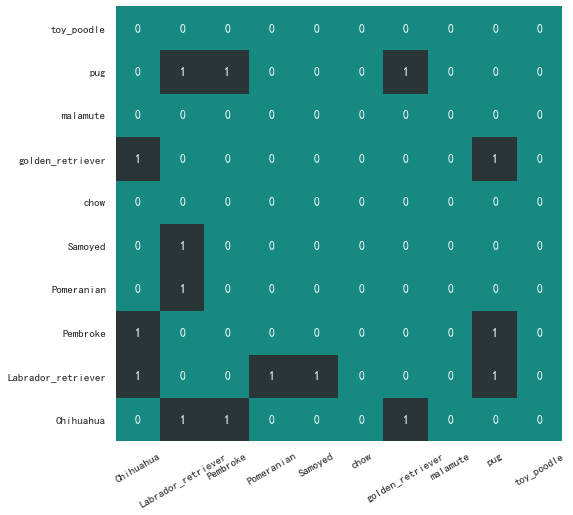

In [236]:
plt.subplots(figsize = (8,8))
sns.heatmap(df_dunns,cbar = False,annot=True,cmap = [ui_dark[0],ui_dark[1]])
plt.xlim([0,10])
plt.ylim([0,10])
plt.xticks(rotation = 30);

In [237]:
df_mid.sort_values(('tweet_id','count'),ascending=0).head(10).sort_values(('retweet_like','mean'))[['breed','retweet_like']]

,breed,retweet_like
,,mean
35,Labrador_retriever,0.293083
79,chow,0.307035
87,golden_retriever,0.307721
92,malamute,0.316597
47,Pembroke,0.319938
105,toy_poodle,0.325571
98,pug,0.347982
48,Pomeranian,0.350285
53,Samoyed,0.397356


通过后续检验的结果我们可以知道除了golden_retriever、Pembroke、Labrador_retriever显著的低于其他狗狗之外，其他的品种的转赞比之间均无显著差异。

由于检验结果显著，我们需要进一步的计算这个结果的效应值

#### 效应量计算

In [238]:
effect_size = (H-10+1)/(retweet_like_test.shape[0]-10)
print('效应值η^2等于{} '.format(effect_size))

效应值η^2等于0.013717453031442946 


效应值只有0.0137，几乎小到可以忽略不计，影响十分有限

### 3.4对平均转赞比前十的狗狗做单因素方差分析

从3.3的分析中我们可以知道，转赞比不呈正态性分布，所以我们只能用非参数的H检验进行分析，为了满足H检验的数据要求，我们筛选出发推量大于5条的狗狗。

In [239]:
df_temp = df_mid[df_mid[('tweet_id','count')]>=5].sort_values(('retweet_like','mean'),ascending=0).head(10)

In [240]:
top10_list = df_temp.breed.to_list()

In [241]:
df_temp = [dog_melt[dog_melt.breed == i]['retweet_like'] for i in top10_list]

#### 样本方差齐性检验
- 使用方法：Levene检验
- H<sub>0</sub>：所有组别来自方差一致的总体，我们选择零假设
- H<sub>1</sub>：有组别来自方差不一致的总体，拒绝零假设
- 置信水平：95%

In [242]:
s,p = stats.levene(*df_temp)
if p<0.05:
    print('拒绝零假设，方差不一致')
else:
    print('接受零假设，方差一致')

接受零假设，方差一致


样本总体不呈正态分布，转赞比前十的品种方差齐性，我们采用Kruskal-Wallis H检验进行检验

#### Kruskal-Wallis H检验
- H<sub>0</sub>：所有组别来自同一个概率分布，我们选择零假设
- H<sub>1</sub>：有组别来自不同的分布，拒绝零假设
- 置信水平：95%

In [243]:
s,p = stats.kruskal(*df_temp)
if p < 0.05:
    print('拒绝零假设，有样本不同的概率分布')
else:
    print('接受零假设，样本来自于同一个概率分布')

接受零假设，样本来自于同一个概率分布


接受了原假设，转赞比前十的狗狗的转赞比没有统计学上的显著差异，我们不作进一步的探讨

In [244]:
df_mid.sort_values(('tweet_id','count'),ascending=0).head(10)

breed favorite_count            rating_numerator            \
                                  mean        sum             mean       std   
87     golden_retriever   12488.317073  1536063.0        11.585366  1.378564   
47             Pembroke   12252.415584   943436.0        11.454545  1.795795   
35   Labrador_retriever   10172.453333   762934.0        11.266667  1.255618   
15            Chihuahua    9477.222222   511770.0        10.833333  1.920593   
98                  pug    6068.292683   248800.0        10.414634  1.687833   
48           Pomeranian    7443.428571   208416.0        11.250000  1.004619   
53              Samoyed   14442.666667   389952.0        11.703704  1.353480   
79                 chow   11629.814815   314005.0        11.666667  1.037749   
105          toy_poodle    8292.370370   223894.0        11.296296  1.170628   
92             malamute    8556.576923   222471.0        10.961538  1.310901   

    retweet_like tweet_id  
            mean    count  
87      0.307721      123  
47      0.319938       77  
35      0.293083       75  
15      0.399517       54  
98      0.347982       41  
48      0.350285       28  
53      0.397356       27  
79      0.307035       27  
105     0.325571       27  
92      0.316597       26

#### 小结：
在对点赞量的方差分析之后我们得出如下建议
- 推主的发推策略可以优先考虑过去的推特中平均点赞量较高（前十）的品种或者选择Samoyed（萨摩耶）、golden_retriever（金毛）、Labrador_retriever（拉布拉多）、Pembroke（威尔士柯基犬）、chow（松狮）等热门品种中平均点赞量较高的品种。

在对转赞比的方差分析之后我们知道
- golden_retriever（金毛）、Labrador_retriever（拉布拉多）、Pembroke（威尔士柯基犬）显著的低于其他狗狗

第一条建议可以帮助提升老用户热度。但若希望推特传播的更广以获取新用户，那么第二条结论或许有一定的参考价值

在综合各个品种狗狗的具体点赞量和转赞比我们评选出**最受群众喜爱奖**——**Samoyed（萨摩耶）**，颁奖礼由如下：发推量最多的狗狗中他的点赞量最高（平均点赞量13970）、转赞比以微弱劣势（-0.2%）屈居亚军（平均转赞比39.7%），这个结论建立在27次的推特数据基础上，值得信赖！

我将**萍水相逢-点赞之交奖**颁发给**golden_retriever（金毛）**，颁奖理由如下：你最受推主喜爱，在两年的时光里推主的推特共提到你123次，远大于其他品种的狗狗，群众们也乐于为你的出现点赞（平均点赞量12631屈居亚军），但似乎大家多是为你点赞，并不愿意分享你的趣事（转赞比30.7%倒数第一）。所以我们和你只是萍水相逢、点赞之交。不过你并不孤单，你的柯基弟弟和你的遭遇基本相同,只是它只被提到了77次。

**值得注意的是**：
以上结论均是在忽略推文质量的影响因素下得出的，由于其效应值很小，所以其指导意义有限

### 3.5对不同生长阶段的狗狗的点赞量做单因素方差分析

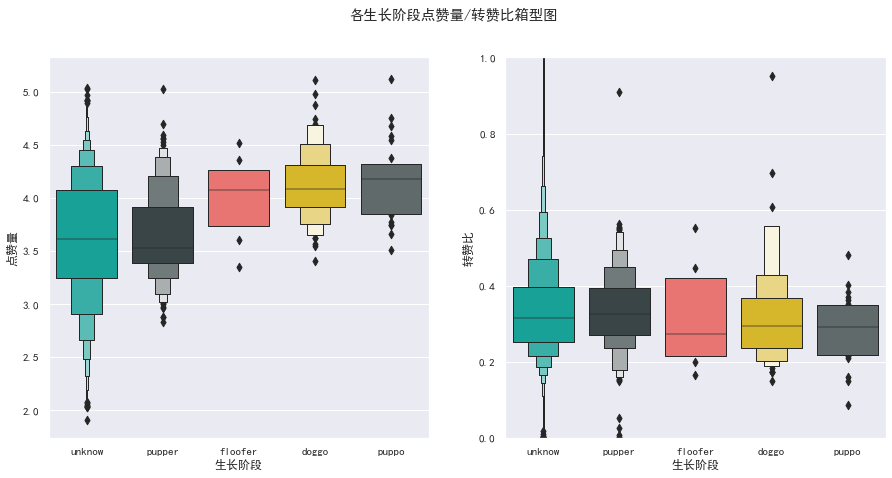

In [245]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,7))
sns.boxenplot(x = dog_melt.stage.fillna('unknow'),y = dog_melt.favorite_count.apply(np.log10),ax = ax1)
ax1.set_xlabel('生长阶段')
ax1.set_ylabel('点赞量')
sns.boxenplot(x = dog_melt.stage.fillna('unknow'),y = dog_melt.retweet_like,ax = ax2)
ax2.set_xlabel('生长阶段')
ax2.set_ylabel('转赞比')
ax2.set_ylim([0,1])
plt.suptitle('各生长阶段点赞量/转赞比箱型图');

#### 样本方差齐性检验
- 使用方法：Levene检验
- H<sub>0</sub>：所有组别来自方差一致的总体，我们选择零假设
- H<sub>1</sub>：有组别来自方差不一致的总体，拒绝零假设
- 置信水平：95%

In [246]:
#数据准备
dog_melt.stage = dog_melt.stage.fillna('unknow')

stage_list =  dog_melt.stage.unique()

favorite_test = [dog_melt[dog_melt.stage == i]['favorite_count'] for i in stage_list]

In [247]:
s,p = stats.levene(*favorite_test)
if p<0.05:
    print('拒绝零假设，方差不一致')
else:
    print('接受零假设，方差一致')

拒绝零假设，方差不一致


In [248]:
stats.levene(*favorite_test)

LeveneResult(statistic=6.431464904591061, pvalue=3.847757089744367e-05)

方差不齐次，我们采用Kruskal-Wallis H检验进行分析

#### Kruskal-Wallis H检验
- H<sub>0</sub>：所有组别来自同一个概率分布，我们选择零假设
- H<sub>1</sub>：有组别来自不同的分布，拒绝零假设
- 置信水平：95%

In [249]:
H,p = stats.kruskal(*favorite_test)
if p < 0.05:
    print('拒绝零假设，有样本来自不同的概率分布')
else:
    print('接受零假设，样本来自于同一个概率分布')

拒绝零假设，有样本来自不同的概率分布


H检验拒绝了原假设，我们进行后续检验，同样的后续检验采用Dunn's检验

In [250]:
df_mid = dog_melt[['stage','favorite_count']]

In [251]:
dunn_result = sp.posthoc_dunn(df_mid,'favorite_count','stage')

In [252]:
dunn_result = dunn_result<0.05

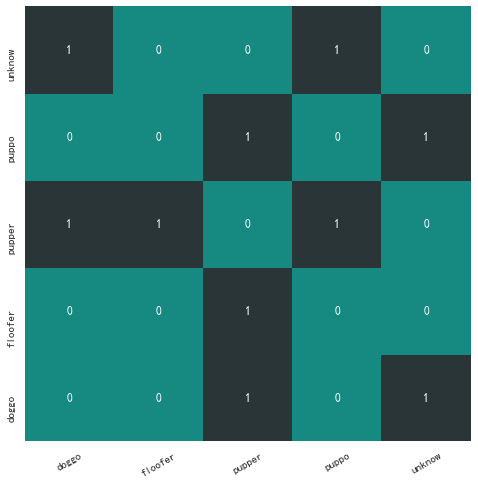

In [253]:
plt.subplots(figsize = (8,8))
sns.heatmap(dunn_result ,cbar = False,annot=True,cmap = [ui_dark[0],ui_dark[1]])
plt.xlim([0,5])
plt.ylim([0,5])
plt.xticks(rotation = 30);

可以看到，生长阶段为puppo/doggo的狗狗的吸赞能力显著的强于unknow/pupper的狗狗，而floofer由于其样本数太少的缘故，我们并不能明确它与其他阶段的差异

#### 效应值计算

In [254]:
effect_size = (H-5+1)/(dog_melt.shape[0]-5)
print('效应值η^2等于{} '.format(effect_size))

效应值η^2等于0.03908650913821972 


效应值0.039，这个结果的影响力很小

### 3.6对不同生长阶段的狗狗的转赞比做单因素方差分析

由于转赞比不呈正态分布，我们直接用Kruskal-Wallis H检验进行分析

#### Kruskal-Wallis H检验
- H<sub>0</sub>：所有组别来自同一个概率分布，我们选择零假设
- H<sub>1</sub>：有组别来自不同的分布，拒绝零假设
- 置信水平：95%

In [255]:
retweet_like_test = [dog_melt[dog_melt.stage == i]['retweet_like'] for i in dog_melt.stage.unique()]

In [256]:
H,p = stats.kruskal(*retweet_like_test)
if p < 0.05:
    print('拒绝零假设，有样本来自不同的概率分布')
else:
    print('接受零假设，样本来自于同一个概率分布')

接受零假设，样本来自于同一个概率分布


结果不显著，我们不作进一步的分析

#### 小结：
很出乎意料的是，puppo/doggo点赞量显著的高于其他狗狗，呆萌可爱的小狗pupper竟然和未分类的unknow样本的点赞量一致。而转赞比方面这几组样本均无区别

### 3.7评分与点赞量/转发量的回归分析

由于推主的打分策略发生过转变，我们只取打分稳定后的数据进行研究

In [257]:
df_mid = dog_melt[dog_melt.month>201610]

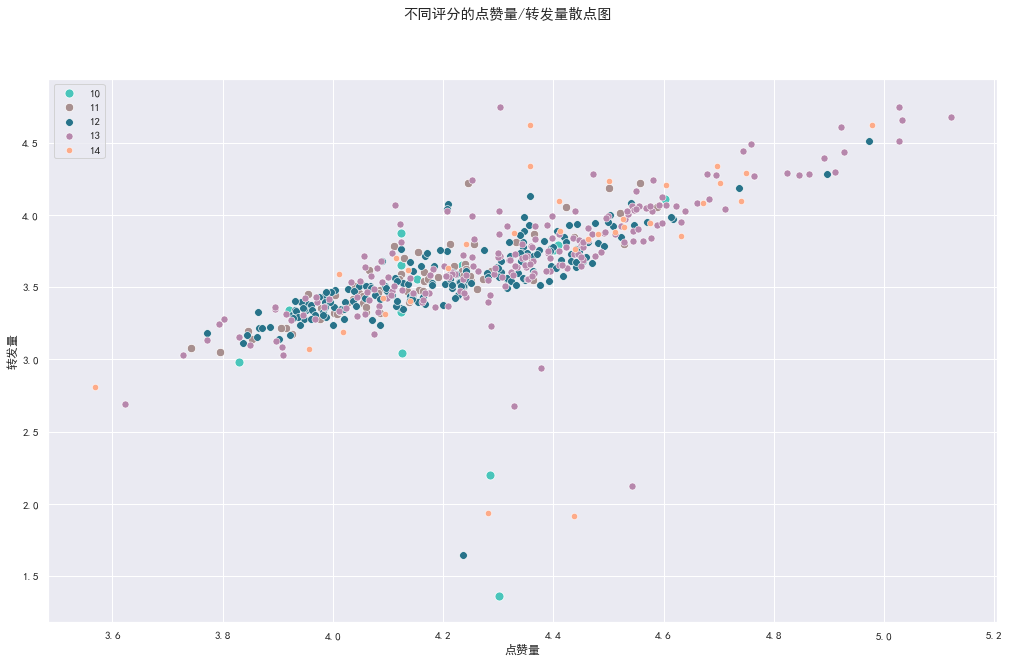

In [258]:
fig = plt.subplots(figsize = (17,10))

for i in [10,11,12,13,14]:
    sns.scatterplot(data = df_mid[df_mid.rating_numerator == i].apply({'rating_numerator':(lambda x:x),'favorite_count':np.log10,'retweet_count':np.log10})
                ,x = 'favorite_count',y = 'retweet_count',color = ui_light[-i%10],label = i,s = (6-i%9)*10+30)
plt.xlabel('点赞量')
plt.ylabel('转发量')
plt.suptitle('不同评分的点赞量/转发量散点图');

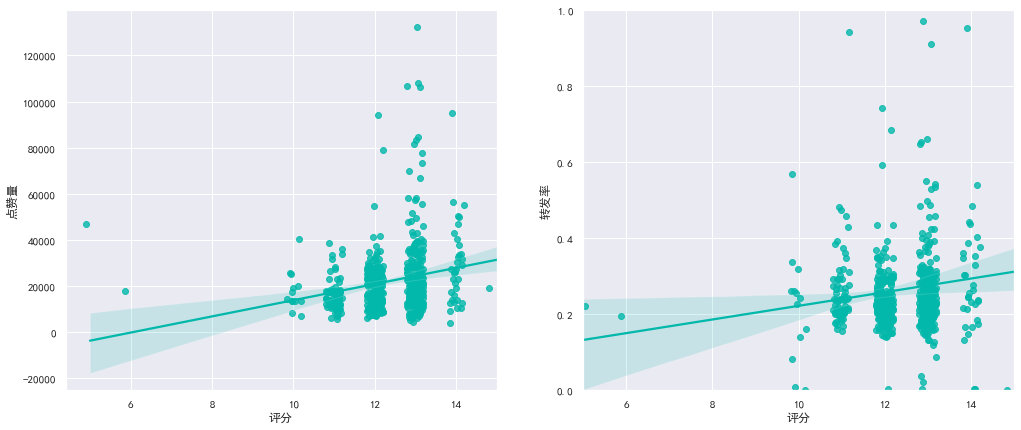

In [259]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (17,7))
sns.regplot(x = df_mid.rating_numerator,y = df_mid.favorite_count,ax = ax1,x_jitter = .2)
ax1.set_xlabel('评分')
ax1.set_ylabel('点赞量')
sns.regplot(x = df_mid.rating_numerator,y = df_mid.retweet_like,ax = ax2,x_jitter = .2)
ax2.set_ylim([0,1])
ax2.set_xlabel('评分')
ax2.set_ylabel('转发率');

#### 对点赞量的线性回归分析 
[参考](https://zhuanlan.zhihu.com/p/22692029)

In [260]:
df_mid['intercept'] = 1

In [261]:
model = sm.OLS(df_mid.favorite_count,df_mid[['rating_numerator','intercept']])

In [262]:
result = model.fit()

In [263]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     26.44
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           3.87e-07
Time:                        09:32:42   Log-Likelihood:                -5678.8
No. Observations:                 514   AIC:                         1.136e+04
Df Residuals:                     512   BIC:                         1.137e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
rating_numerator  3512.3194    683.056      5.142      0.000    2170.382    4854.256
intercept        -2.138e+04   8448.021     -2.531      0.012    -3.8e+04   -4787.940
==============================================================================
Omnibus:                      347.955   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3928.313
Skew:                           2.884   Prob(JB):                         0.00
Kurtosis:                      15.253   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

所以点赞量和评分之间的关系为

favorite_count = 3512 * rating_numerator - 2138

可以解释4.9%的方差,模型效力很低

#### 对转发量的线性回归分析

In [264]:
model = sm.OLS(df_mid.retweet_like,df_mid[['rating_numerator','intercept']])

In [265]:
result = model.fit()

In [266]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           retweet_like   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     5.372
Date:                Thu, 17 Sep 2020   Prob (F-statistic):             0.0209
Time:                        09:32:42   Log-Likelihood:                 174.51
No. Observations:                 514   AIC:                            -345.0
Df Residuals:                     512   BIC:                            -336.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
rating_numerator     0.0179      0.008      2.318      0.021       0.003       0.033
intercept            0.0425      0.096      0.444      0.657      -0.146       0.231
==============================================================================
Omnibus:                      774.717   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           229656.273
Skew:                           8.167   Prob(JB):                         0.00
Kurtosis:                     105.257   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

这是一个无效的模型

### 3.8对不同评分等级狗狗点赞量的单因素方差分析

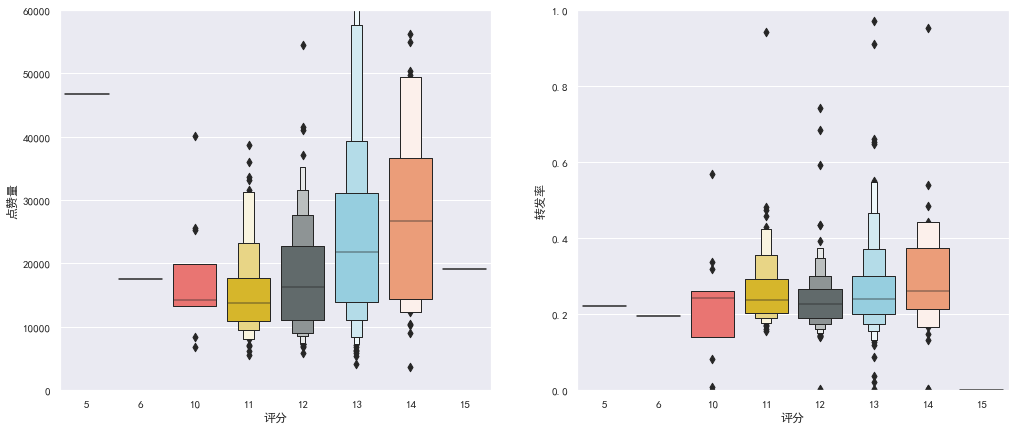

In [267]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (17,7))
sns.boxenplot(x = df_mid.rating_numerator,y = df_mid.favorite_count,ax = ax1)
ax1.set_ylim([0,60000])
ax1.set_xlabel('评分')
ax1.set_ylabel('点赞量')
sns.boxenplot(x = df_mid.rating_numerator,y = df_mid.retweet_like,ax = ax2)
ax2.set_ylim([0,1])
ax2.set_xlabel('评分')
ax2.set_ylabel('转发率');

#### 正态性检验
- H<sub>0</sub>：取对数后的点赞量呈现正态分布（取对数存在一些问题，有可能导致对数化后的数据与原始数据）
- H<sub>1</sub>: 取对数后的点赞量不符合正态分布
- 置信水平：95%

In [268]:
df_mid = df_mid[(df_mid.rating_numerator>9)&(df_mid.rating_numerator<15)]

In [269]:
s,p = stats.normaltest(df_mid.favorite_count)
if p<0.05:
    print('拒绝零假设，不呈正态分布')
else:
    print('接受零假设，呈正态分布')

拒绝零假设，不呈正态分布


#### 样本方差齐性检验
- 使用方法：Levene检验
- H<sub>0</sub>：所有组别来自方差一致的总体，我们选择零假设
- H<sub>1</sub>：有组别来自方差不一致的总体，拒绝零假设
- 置信水平：95%

In [270]:
df_temp = [df_mid[df_mid.rating_numerator == i]['favorite_count'] for i in [10,11,12,13,14]]

In [271]:
s,p = stats.levene(*df_temp)
if p<0.05:
    print('拒绝零假设，方差不一致')
else:
    print('接受零假设，方差一致')

拒绝零假设，方差不一致


非正态分布，方差又不齐次，采用Kruskal-Wallis H检验

#### Kruskal-Wallis H检验
- H<sub>0</sub>：所有组别来自同一个概率分布，我们选择零假设
- H<sub>1</sub>：有组别来自不同的分布，拒绝零假设
- 置信水平：95%

In [272]:
H,p = stats.kruskal(*df_temp)
if p < 0.05:
    print('拒绝零假设，有样本来自不同的概率分布')
else:
    print('接受零假设，样本来自于同一个概率分布')

拒绝零假设，有样本来自不同的概率分布


零假设被拒绝，需要进行后续检验找出是那组数据不同于其他数据

#### 后续检验 Dunn's检验
- 零假设H<sub>0</sub>：观察到从样本1中随机抽取的值大于样本2中随机抽取的值的几率为0.5（也即两样本的均值相同）
- 备择假设H<sub>1</sub>：观察到从样本1中随机抽取的值大于样本2中随机抽取的值的几率不为0.5，也即两样本的均值不相同
- 置信水平：0.05

In [273]:
result = sp.posthoc_dunn(df_mid[['favorite_count','rating_numerator']],'favorite_count','rating_numerator')

In [274]:
result = result<0.05

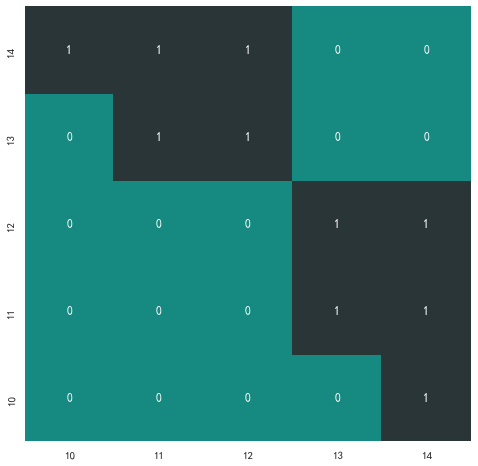

In [275]:
plt.subplots(figsize = (8,8))
sns.heatmap(result,cbar = False,annot=True,cmap = [ui_dark[0],ui_dark[1]])
plt.xlim([0,5])
plt.ylim([0,5]);

可以看到评分为13、14的狗狗点赞量显著的高于其他评分的狗狗，的确主观评分越高客观的点赞量也会越高

#### 效应量计算

In [276]:
effect_size = (H-5+1)/(df_mid.shape[0]-5)
print('效应值η^2等于{} '.format(effect_size))

效应值η^2等于0.08528356943811026 


效应值0.085，影响比较有限

### 3.9对不同评分等级等级转赞比的单因素方差分析

#### 正态性检验
- H<sub>0</sub>：取对数后的点赞量呈现正态分布（取对数存在一些问题，有可能导致对数化后的数据与原始数据）
- H<sub>1</sub>: 取对数后的点赞量不符合正态分布
- 置信水平：95%

In [277]:
s,p = stats.normaltest(df_mid.retweet_like)
if p<0.05:
    print('拒绝零假设，不呈正态分布')
else:
    print('接受零假设，呈正态分布')

拒绝零假设，不呈正态分布


#### 样本方差齐性检验
- 使用方法：Levene检验
- H<sub>0</sub>：所有组别来自方差一致的总体，我们选择零假设
- H<sub>1</sub>：有组别来自方差不一致的总体，拒绝零假设
- 置信水平：95%

In [278]:
df_temp = [df_mid[df_mid.rating_numerator == i]['retweet_like'] for i in [10,11,12,13,14]]

In [279]:
stats.levene(*df_temp)
if p<0.05:
    print('拒绝零假设，方差不一致')
else:
    print('接受零假设，方差一致')

拒绝零假设，方差不一致


非正态分布，方差又不齐次，采用Kruskal-Wallis H检验

#### Kruskal-Wallis H检验
- H<sub>0</sub>：所有组别来自同一个概率分布，我们选择零假设
- H<sub>1</sub>：有组别来自不同的分布，拒绝零假设
- 置信水平：95%

In [280]:
H,p = stats.kruskal(*df_temp)
if p < 0.05:
    print('拒绝零假设，有样本来自不同的概率分布')
else:
    print('接受零假设，样本来自于同一个概率分布')

拒绝零假设，有样本来自不同的概率分布


零假设被拒绝，需要进行后续检验找出是那组数据不同于其他数据

#### 后续检验 Dunn's检验
- 零假设H<sub>0</sub>：观察到从样本1中随机抽取的值大于样本2中随机抽取的值的几率为0.5（也即两样本的均值相同）
- 备择假设H<sub>1</sub>：观察到从样本1中随机抽取的值大于样本2中随机抽取的值的几率不为0.5，也即两样本的均值不相同
- 置信水平：0.05

In [281]:
result = sp.posthoc_dunn(df_mid[['retweet_like','rating_numerator']],'retweet_like','rating_numerator')

In [282]:
result = result<0.05

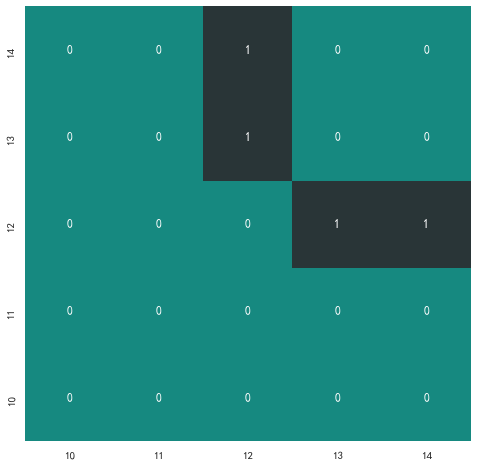

In [283]:
plt.subplots(figsize = (8,8))
sns.heatmap(result,cbar = False,annot=True,cmap = [ui_dark[0],ui_dark[1]])
plt.xlim([0,5])
plt.ylim([0,5]);

后续检验只能得出一个结论，评分为12的推特转赞比显著的低于评分为13、14的推特，不过这个结论似乎意义不大，并且从箱线图来看他们也只有微弱的差别

#### 效应量计算

In [284]:
effect_size = (H-5+1)/(df_mid.shape[0]-5)
print('效应值η^2等于{} '.format(effect_size))

效应值η^2等于0.011964834511768977 


果然，其效应值非常小，我认为可以忽略这个差异

#### 小结
- 我们拟合了点赞量和转赞比与评分之间的线性关系，其中只有点赞量与评分的线性关系有很小的解释力，转赞比和评分的线性关系几乎没有解释力
- 通过对点赞量的单因素方差分析我们看到评分13，14的狗狗点赞量明显的高于低分的狗狗
- 不同评分的转赞比之间虽然存在差异但差异非常小

## 4总结

经过若此冗长的分析讨论之后，终于可以长舒一口气来一个大大的总结了。

### 4.1数据集的清洗和整理

关于数据集存在的问题，我们做了以下工作：
- 删除了不需要的列并将dogrates/retweets/breeds三个是数据合并
- 填补了doggo，floofer，pupper，puppo的缺失值,并将这4列数据合并为一行
- 更改了timestamp格式为datetime
- 编写正则规则重新提取了评分数据解决了以下问题
    - rating_numerator应该为10-20之间的整数
    - rating_denominator应该全部为10
    - 部分推特的评分未被提取
- 删除了与评分无关的推特
- 删除了评分为0的推特
- 对于评分过高的推特，对部分未打小数点数据进行了修改，对不合理高分进行了删除
- 利用移动平均值解决了点赞量列的部分数据为0而转发量却不为0 的问题
- 对于三个机器学习的模型预测结果，我们将三个模型都预测为狗的推特定义为is_dog（确定是狗），将三个模型存在分歧的推特定义为mabe_dog（也许是狗），将三个模型都否定的推特定义为not_dog（不是狗）

我们还从数据集中提取了一些特征：
- 我们从name列提取了性别信息
- 我们计算了转赞比，这也是后续讨论的重点对象之一
- 我们提取了在推特运营过程中的一些里程碑式的推特，这些推特在该账号的运营历程中创造了点赞量/转赞比的新高
- 将评分按照5、10划分为了三个区间，分别为高、中、低

### 4.2可视化

**对点赞量转发量等数值型数据的观察我们发现：**
- 点赞量和转发量之间呈正相关关系，这很容易理解，并且这并无太大意义
- 推特id和点赞量之间呈正相关关系，推特id是按照时间递增的，这说明随着时间的推移，推特越来越受欢迎
- 评分与点赞量之间并不呈显著的正相关关系
- 点赞量与转赞比之间竟然没有关系

**在引入月这个观察量之后我们有了这些有趣的发现：**
- 你不如以前勤快了
    - 15年11月到12月发推非常频繁，保持了每月300条的更新
    - 16年1月至4月逐步减少，在第4月时已减少至每月50条水平
    - 最后基本保持在每月50-80条左右
- 奇怪的曲线增加了
    - 前两个月点赞量维持了较高水平的增长。但是推主却决定在第三个月改变发推策略，不在追求量的优势，随之而来的是月点赞量的陡减。而事实证明他们的决定是正确的，随着时间的推移，他们在2016年4月开始触底反弹，并且于2017年1月用70条推文超过之前每月300+推文才能获得的月均点赞量
- 每条推特越来越受欢迎——是有意为之还是被迫的妥协？

    - 每条推文的平均点赞量就很能说明问题了，每月推文平均点赞量基本随着时间的推移在递增（我们可以猜测一下原因：每天大量频繁的更新受限于推主有限的精力和有限的推特素材与灵感，这两者的逼近极限都可能导致推文质量的下降，这种模式不可能长久，最终必然会走精品路线。并且对粉丝来说他们也不希望大量的推特轰炸，每天10+的推特量实在是有点多了）
- 这速度太令人吃惊了！
    - 每条推特实现点赞量三位数的突破仅仅用了不到2个月，实现4位数的突破用时不到一年，增长趋势近似于指数级的增长。其蹿红的速度可以用神速来形容，
        并且该账号在两年的时间内并没有出现人气下降的危机，仍然是一个在茁壮成长的推特
    - 可以看到虽然同样是指数级的增长，但初期的指数明显更大，在16年3月之后大致维持一个较小指数级的增长
    - 转赞比呈波动递减的趋势，根据生活经验，没有谁会一直转发同一类型的推特，我们在关注一个推特的初期更加容易转发内容，关注时间越长，同一类型的推特更难让我们有那种被惊艳到迫不及待的转发的情绪，所以波动下降的趋势也就能够理解了
- 越来越高且越来越同质化的评分
    - 随着时间的推移狗狗的评分越来越高了,且评分区间在不断的收窄，最后绝大部分评分都落在了12-13区间
    - 15年的推特平均评分在10以下，我有理由相信在16年年初推主才开始改变评分策略，形成了独具特色的评分机制（超过10分的评价），看来16年1月对于这个we_rate_dogs来说是不平凡的一个月(评分机制及发推策略的改变)
- 高分占比越来越高，到2017年1月时已经没有中低分存在了

**引入小时这个变量后我们发现每日6点的推特点赞量明显的高于其他时段，真是这样吗？另外，我们还有其他的发现：**
- 6点发的推特点赞量爆表，真就这么有效吗？当然不是啦，只有三条微博而已，说明不了什么问题
- 1-5点的发推数据表明，越晚发获得的平均点赞量就越少，推主也更习惯早发而不是临近睡觉了再发
- 推主的作息真的超有规律，两年多愣是只熬夜发了三条推特（6点发的三条）

**对于分类变量，我们的观察如下：**
- 品种
    - 多样性：共有108种不同品种的狗被推特提及，范围还蛮广的，但是推主似乎更加偏爱某些狗狗如金毛、柯基、吉娃娃、八哥、博美等，发推量前十的狗狗总发推数占比达到了40%
    - 越热门越稳定：随着发推数增多平均点赞量逐渐收敛
    - 那些狗狗更受欢迎：我们看到发推数前三的狗狗平均点赞量均高于平均值，平均点赞量前十的狗狗都是较冷门的狗狗，那么我们是否可以确定某些品种的狗狗平均点赞量显著高于其他狗狗的品种呢？这是接下来统计学检验板块讨论的对象
    - 平均转赞比近似正态分布，推特量前3的狗狗转赞比均在总平均值上下波动
    - 转战比前10的狗狗均是了冷门狗狗，不过吉娃娃似乎是个例外，我们需要对转赞比前十的狗狗做因子方差分析，看看是否有狗狗的转赞比显著高于平均值
    - 推主的喜好很固定——虽然不同品种的狗平均分不同，但同一个品种的狗评分差异多在2分以内（标准差小于2）
    - 对评分更高的品种评价就越统一(标准差越小）
    - 评分均值和评分标准差基本符合正太分布
- 生长状态
    - 不同生长阶段的狗在点赞量上竟然有数量级上的差异，这个差异是否显著呢，接下来的板块将回答这个问题
- 评分
    - 评分越高点赞量越高、转发率越低，我推测可能受两个因素影响：
    
        1.在审美不奇特的情况下，主观评分高的狗狗客观上更加能收到大多数人的喜爱 
        
        2.由于推主打分策略的改变，打分随着时间逐渐增高，同时粉丝数也随着时间增多，故造成了点赞数随着评分增加的假象,接下来进一步的分析

    - 评分越高，点赞数的分布越广
- 评分的进一步分析（只取2016.10评分稳定后的数据进行分析）
    - 的确，评分越高点赞量越高，且评分越高点赞量的分布越广
    - 评分和转发率的关系由上面的负相关转变为了正相关，看来评分越高的狗狗的确更加讨喜,但这个相关性并不明显，11、12、13分段的转赞比分布基本相同
    - 这个阶段已经没有低分的存在了，全员10+

**小结：我认为比较重要的结论**
- 推特id和点赞量之间呈正相关关系，推特id是按照时间递增的，这说明随着时间的推移，推特越来越受欢迎
- 该账号的运营策略发生了一个巨大的转变，由前期的多而杂转变为了后期的少而精，且在微博运营的中期形成了独具特色的评分（10+）
- 2616年前三个月是一个分水岭，在这之前该推特的表现是：
    - 每月300+的发推量
    - 巨高的增长速度（每条推特实现点赞量三位数的突破仅仅用了不到2个月），指数级的增长
    - 推特平均点赞量低
    - 多样化的评分（高中低共存）
- 在2016年年中过后，该推特的表现是：
    - 每月50-80条的推特量
    - 每条推特点赞量仍然呈较高的额速度增长，但增速明显放缓了
    - 较高的平均点赞量
    - 评分趋同，均是10+的高分
- 转赞比呈波动递减趋势
- 每天晚上越晚发推获得的点赞量就越少
- 账号在两年的时间内并没有出现人气下降的危机（每条推特点赞量稳定增长），仍然是一个在茁壮成长的推特
- 多样性：共有108种不同品种的狗被推特提及，但推主似乎非常偏爱金毛（147条），当然拉布拉多、柯基、吉娃娃也不差（80+）
- 评价统一：同一个品种的狗评分差异多在2分以内

### 4.3 统计检验

**我们检验了不同品种的狗狗的点赞量和转赞比的差异，得到了一些更加可靠也非常有趣的结论：**
- 推主的发推策略可以优先考虑过去的推特中平均点赞量较高（前十）的品种或者选择Samoyed（萨摩耶）、golden_retriever（金毛）、Labrador_retriever（拉布拉多）、Pembroke（威尔士柯基犬）、chow（松狮）等热门品种中平均点赞量较高的品种。

- golden_retriever（金毛）、Labrador_retriever（拉布拉多）、Pembroke（威尔士柯基犬）显著的低于其他狗狗


- 在综合各个品种狗狗的具体点赞量和转赞比我们评选出**最受群众喜爱奖**——**Samoyed（萨摩耶）**，颁奖礼由如下：发推量最多的狗狗中他的点赞量最高（平均点赞量13970）、转赞比以微弱劣势（-0.2%）屈居亚军（平均转赞比39.7%），这个结论建立在27次的推特数据基础上，值得信赖！

- 我将**萍水相逢-点赞之交奖**颁发给**golden_retriever（金毛）**，颁奖理由如下：你最受推主喜爱，在两年的时光里推主的推特共提到你123次，远大于其他品种的狗狗，群众们也乐于为你的出现点赞（平均点赞量12631屈居亚军），但似乎大家多是为你点赞，并不愿意分享你的趣事（转赞比30.7%倒数第一）。所以我们和你只是萍水相逢、点赞之交。不过你并不孤单，你的柯基弟弟和你的遭遇基本相同,只是它只被提到了77次。

**第一条建议可以帮助提升老用户热度。但若希望推特传播的更广以获取新用户，那么第二条结论或许有一定的参考价值**

**值得注意的是**：
以上结论均是在忽略推文质量的影响因素下得出的，由于其效应值很小，所以其指导意义有限

---

**对于不同生长阶段的狗狗，我们发现：**
- 很出乎意料的是，puppo/doggo点赞量显著的高于其他狗狗，呆萌可爱的小狗pupper竟然和未分类的unknow样本的点赞量一致。而转赞比方面这几组样本均无区别

**纳尼？呆萌的小狗竟然不吃香，不过也可以理解，这本来就是一个以搞笑著称的推特，呆萌可爱可不是卖点**

---

**评分越高越受欢迎吗？**
- 我们拟合了点赞量和转赞比与评分之间的线性关系，其中只有点赞量与评分的线性关系有很小的解释力，转赞比和评分的线性关系几乎没有解释力

点赞量和评分之间的关系为:favorite_ count = 3512 * rating_ numerator - 2138
- 通过对点赞量的单因素方差分析我们看到评分13，14的狗狗点赞量明显的高于低分的狗狗
- 不同评分的转赞比之间虽然存在差异但差异非常小

**的确，评分越高越受欢迎，看起来只有溢出的评分（10+）才能表达人们对于狗狗的喜爱呀，不得不说推主的评分机制改革很有效**

### 4.4反思

- 分析的角度和目标还值得在讨论，目前的分析战线拖得有一点过于长了，有过度分析的嫌疑（当然从中我也学到了很多）
- 我们目前只做到了分析数据，但是并没有进一步的分析我们这个分析的前提条件，比如我们的分析前提假设是忽略推特本身内容因素。其实这是一个非常关键的因素，毕竟这个推特的最大卖点是有趣搞笑
- 我们结论的置信度还是比较低的，结论的指导意义比较有限
- 在框架内做出的分析无法跳出框架得出结论，比如如果只分析前两个月的评分，我们无法得出10+的评分会更加受欢迎的结论，当然也就不可能有后来评分机制的转向了。这点这些需要对行业更加深入的了解以及一些额外的灵感了